In [2056]:
#IMPORT IMP Library for data manipulation and data rendering 

import os
import pandas as pd
from IPython.display import Image 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
tf.debugging.set_log_device_placement(True)
from keras.callbacks import EarlyStopping,ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from keras.models import Sequential, Model,load_model
from keras.preprocessing import image
from keras.initializers import glorot_uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


Image(url="obesity-signs-symptoms-and-complications-4689168-v1-f9b474a31054404bb2307b221303c9e9.png", width=1200, height=800) 

In [2057]:

#Define filepath
filepath = os.getcwd()

#Function for reading file from your current directory
def read_csv(filepath,filename):

    #Read file from your path
    df = pd.read_csv(filename)
    return df

#Give filepath and file name to read.(in my case it is 'train.csv')
df = read_csv(filepath,'train.csv').drop(columns=['id'])

In [2058]:
#View head of data
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [2059]:
#Describe how the dataset is looking
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [2060]:
#If any null values present
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [2061]:
#Define function to convert column datatype
def convert_age(df, columnname):
    
    #Define variable how they should work
    df[columnname] = df[columnname].astype('int32')
    return df

#Save datatype in dataframe
df = convert_age(df,'Age')

In [2062]:
#Make two empty list for numeric and object data
#save numeric data into num empty list
num= []
cat = []

#iterate through dataset and save different dtypes in different list
for col in df.columns:

    #take help of api to save numeric data into an empty list
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    else:
        cat.append(col)

#Print empty list
print(num)
print(cat)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']


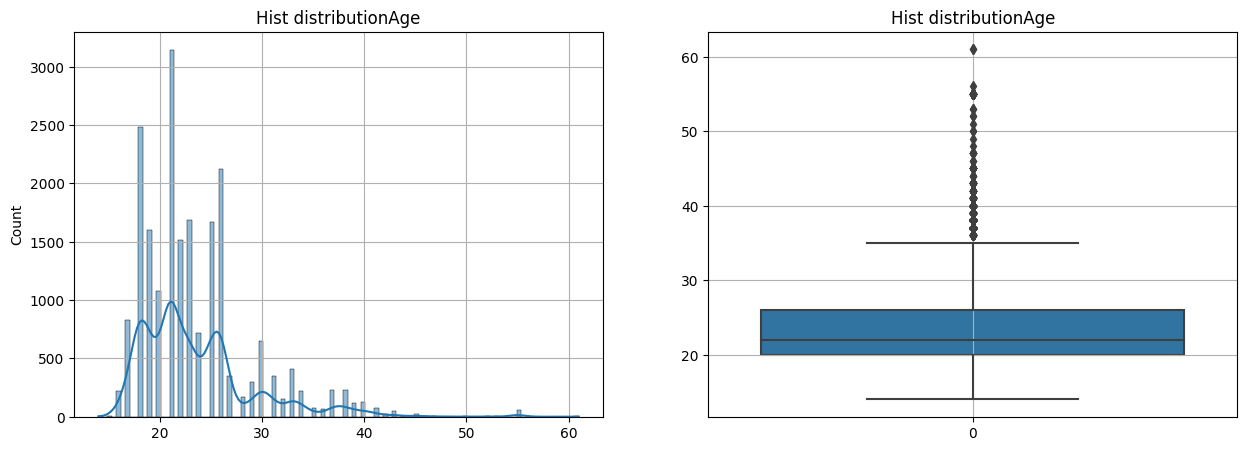

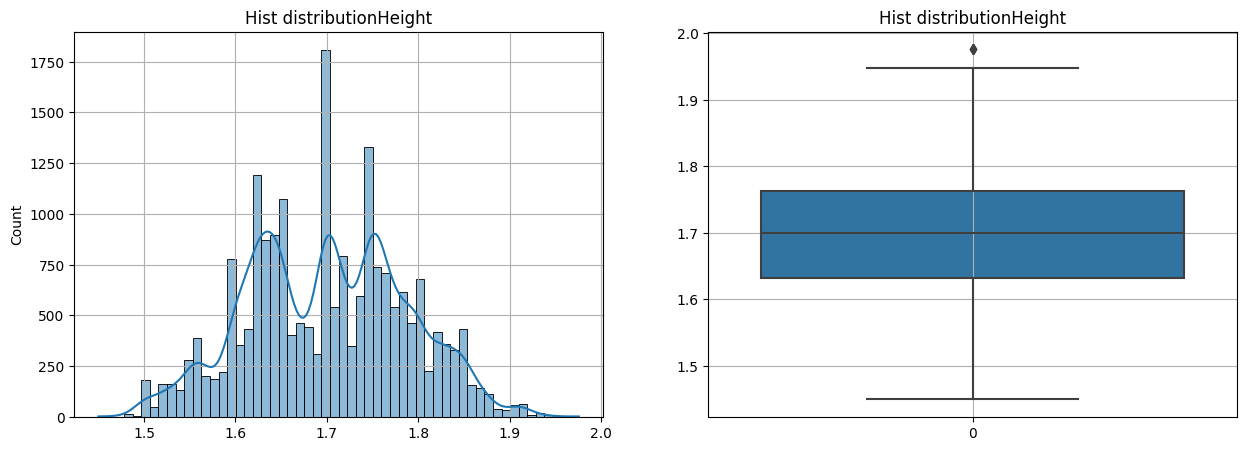

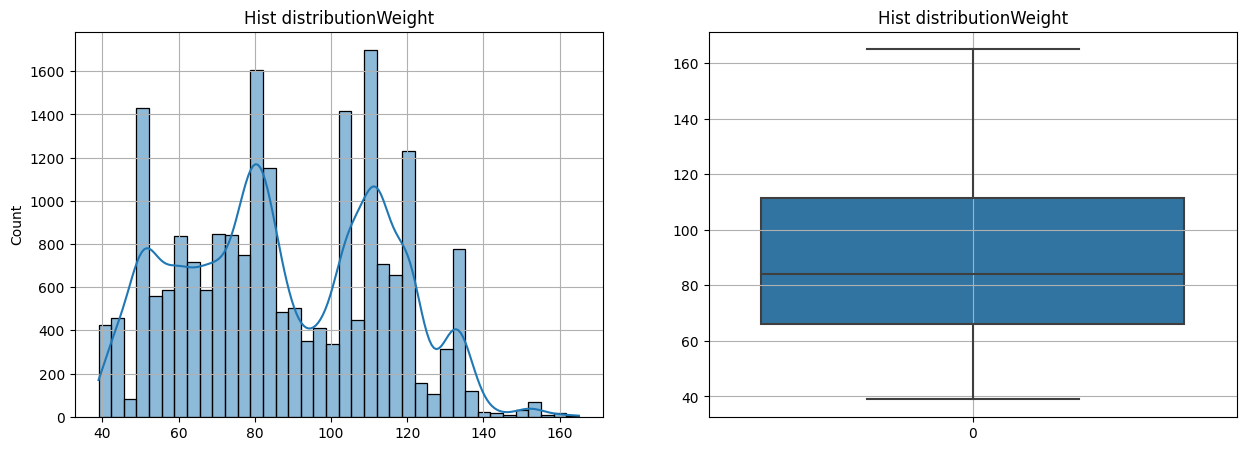

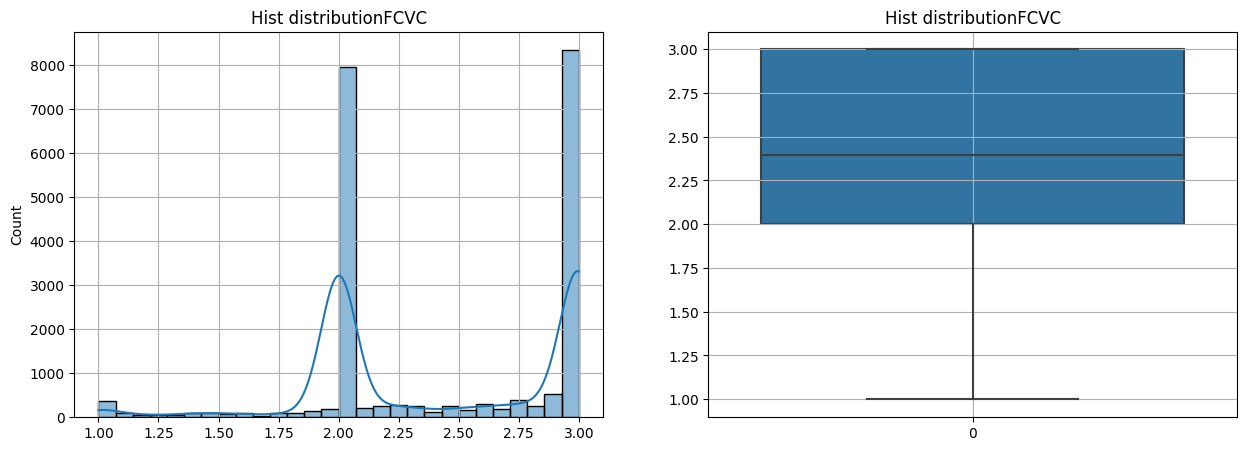

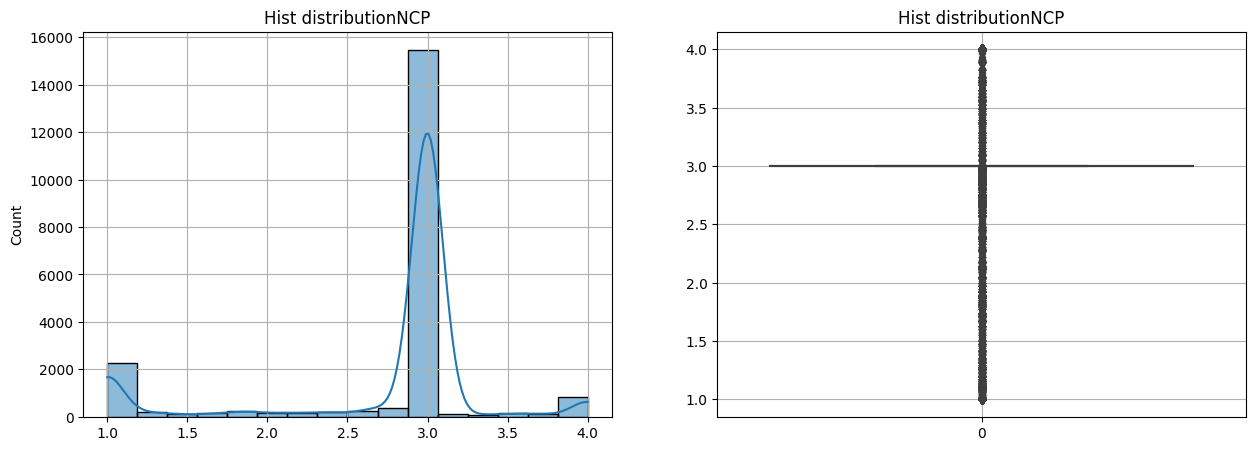

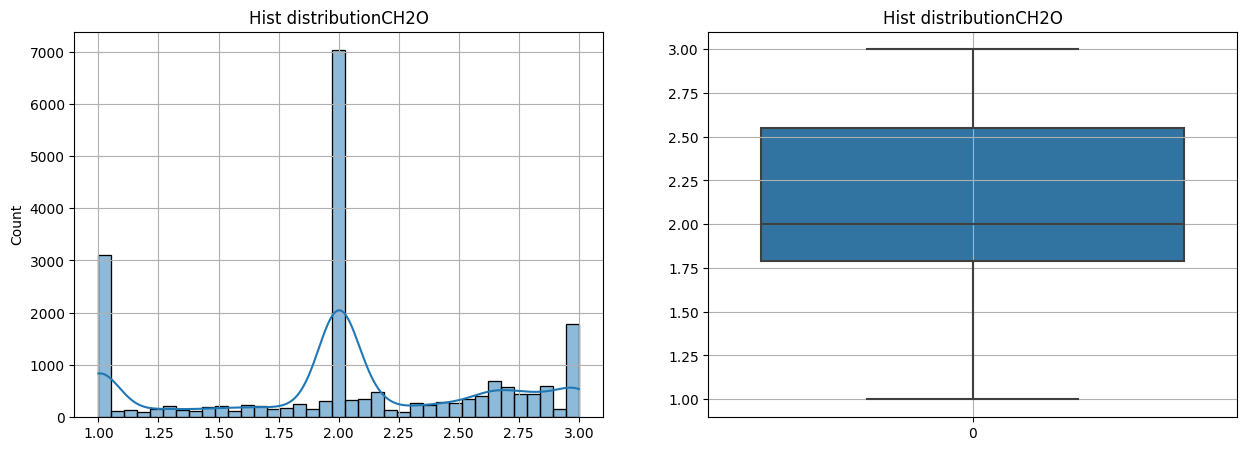

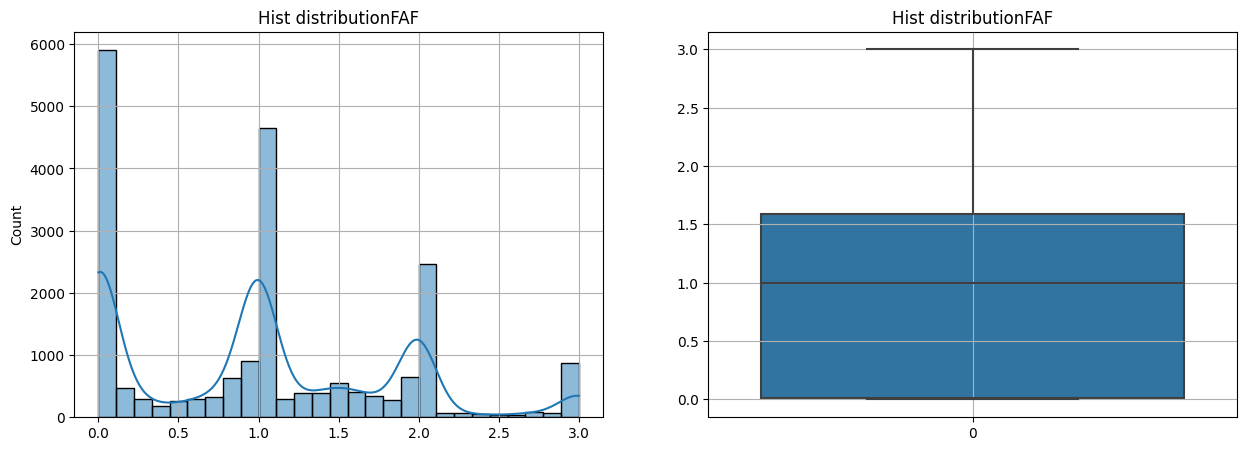

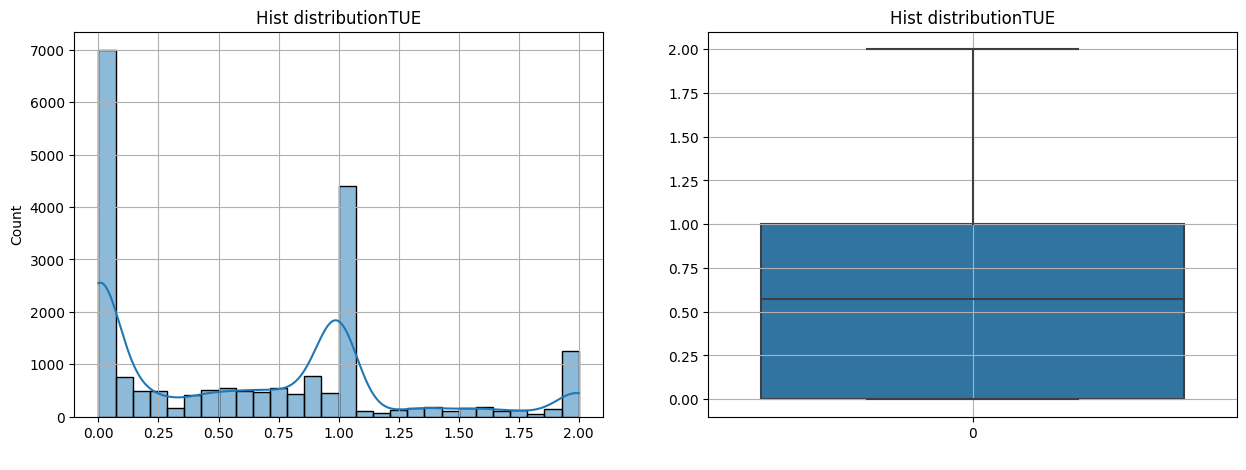

In [2063]:

#Multiple plot of numeric columns and 

for i in num:

    #Iterate through all the data values 
    figure,axes = plt.subplots(1,2,figsize=(15,5))
    sns.histplot(df[i],ax=axes[0],kde=True)
    axes[0].set_title(f"Hist distribution{i}")
    axes[0].grid(True)
    axes[0].set_xlabel(" ")

    #box plot
    sns.boxplot(df[i],ax=axes[1])
    axes[1].set_title(f"Hist distribution{i}")
    axes[1].grid(True)
    axes[1].set_xlabel(" ")

    

### We can see that there are some areas where we are having **outliers** 

<Figure size 2000x600 with 0 Axes>

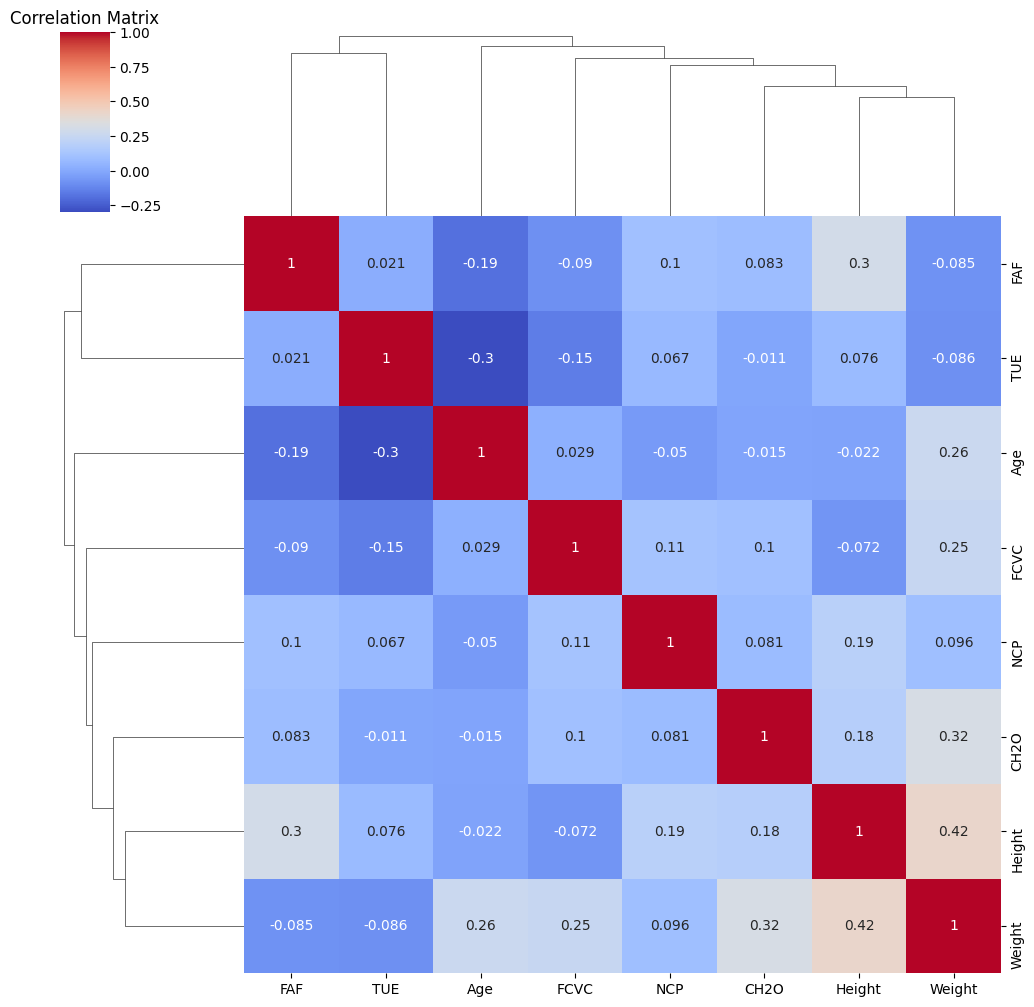

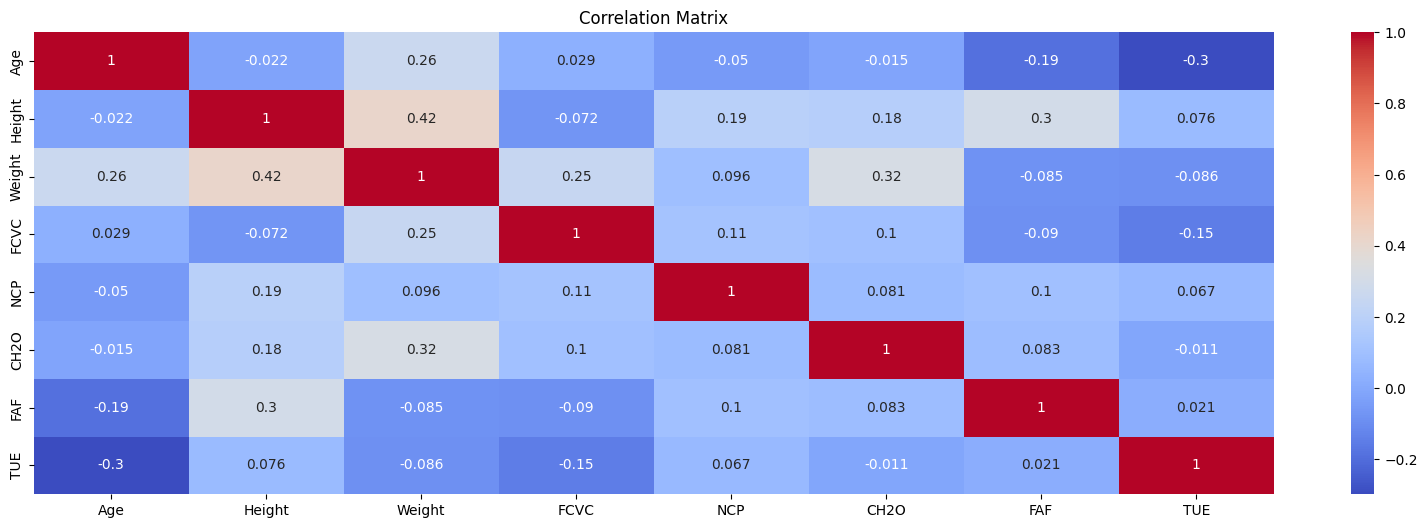

In [2064]:
corr = df.select_dtypes(include=['int','float']).corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 6))
sns.clustermap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


plt.figure(figsize=(20, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

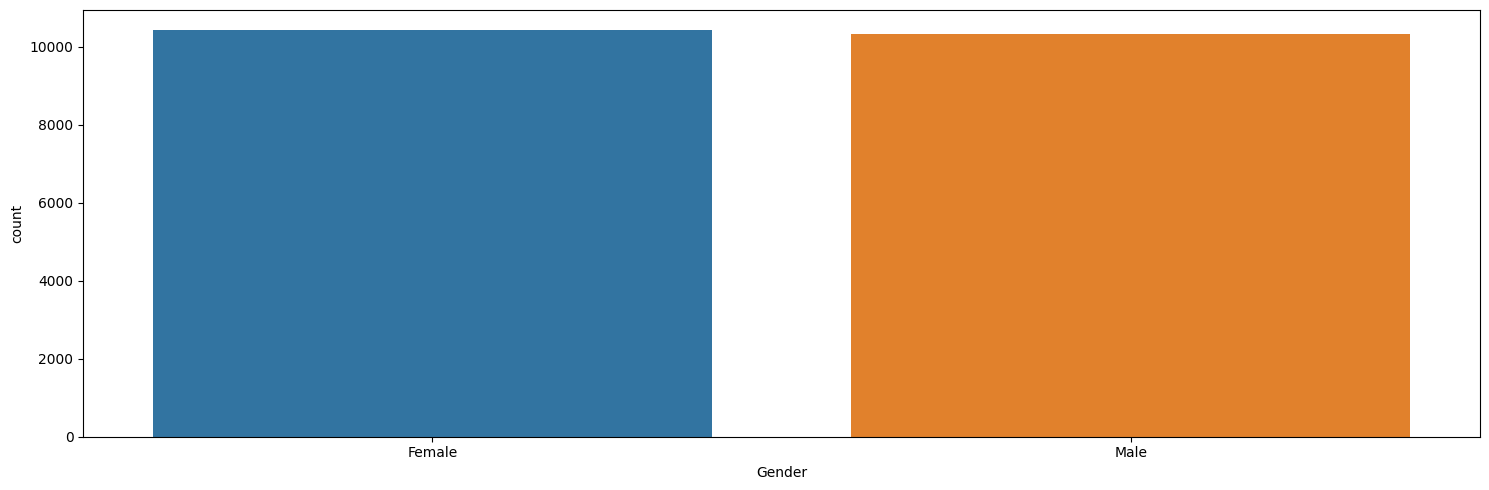

In [2065]:
#plot univariate columns

def count_plot(df,columnname):
    figure = plt.subplots(figsize=(15,5))
    sns.countplot(data=df,x=df[columnname],order=df[columnname].value_counts().index[:20])
    plt.xlabel(columnname)
    plt.tight_layout()
count_plot(df,'Gender')

In [2066]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


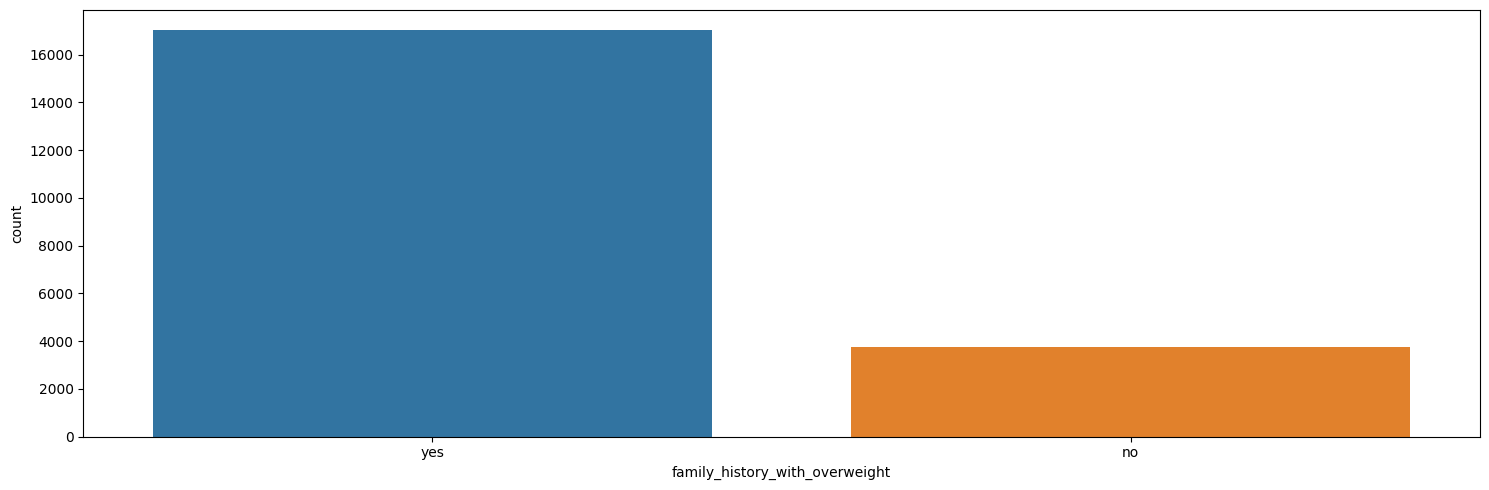

In [2067]:
#Plotting 'family_history_with_overweight'
count_plot(df,'family_history_with_overweight')

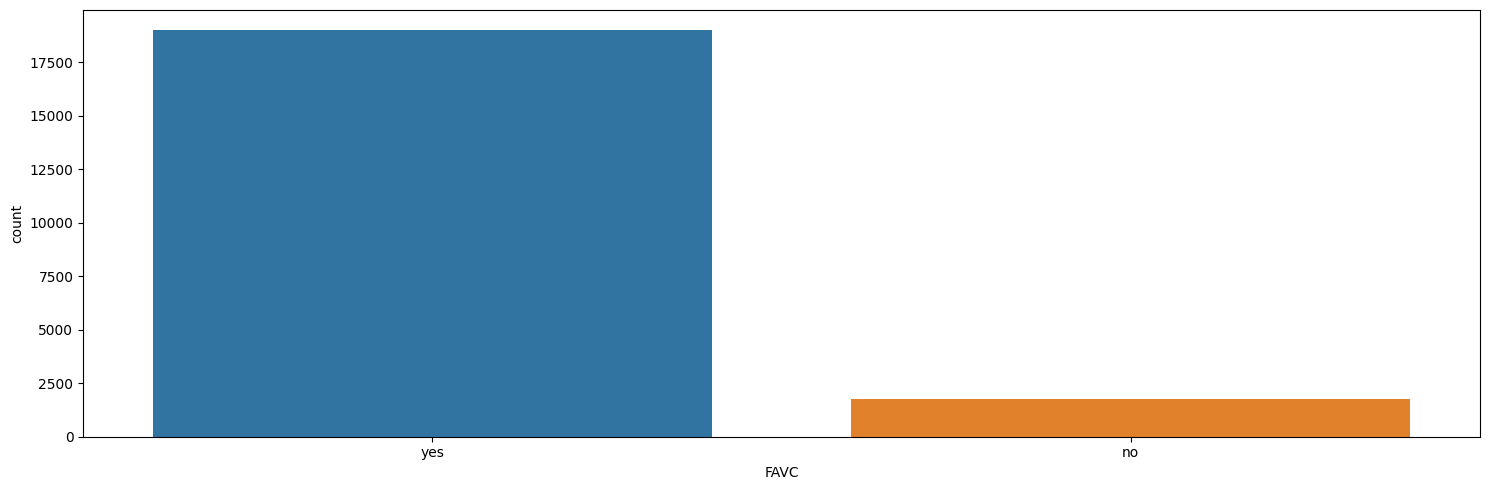

In [2068]:
count_plot(df,'FAVC')

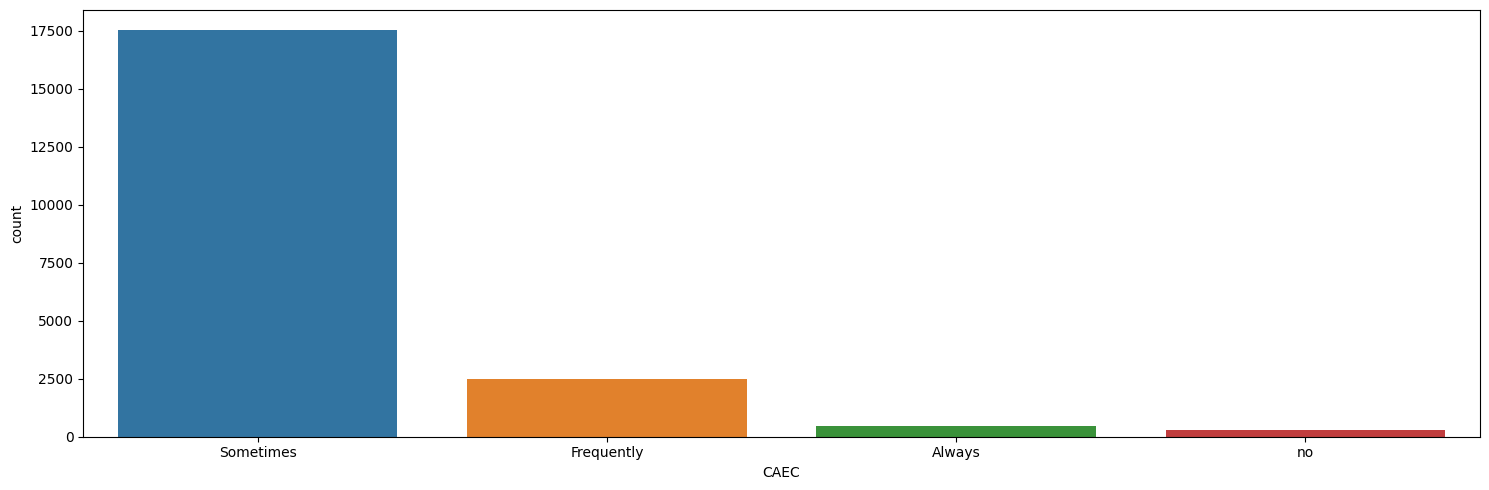

In [2069]:
count_plot(df,'CAEC')

In [2070]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


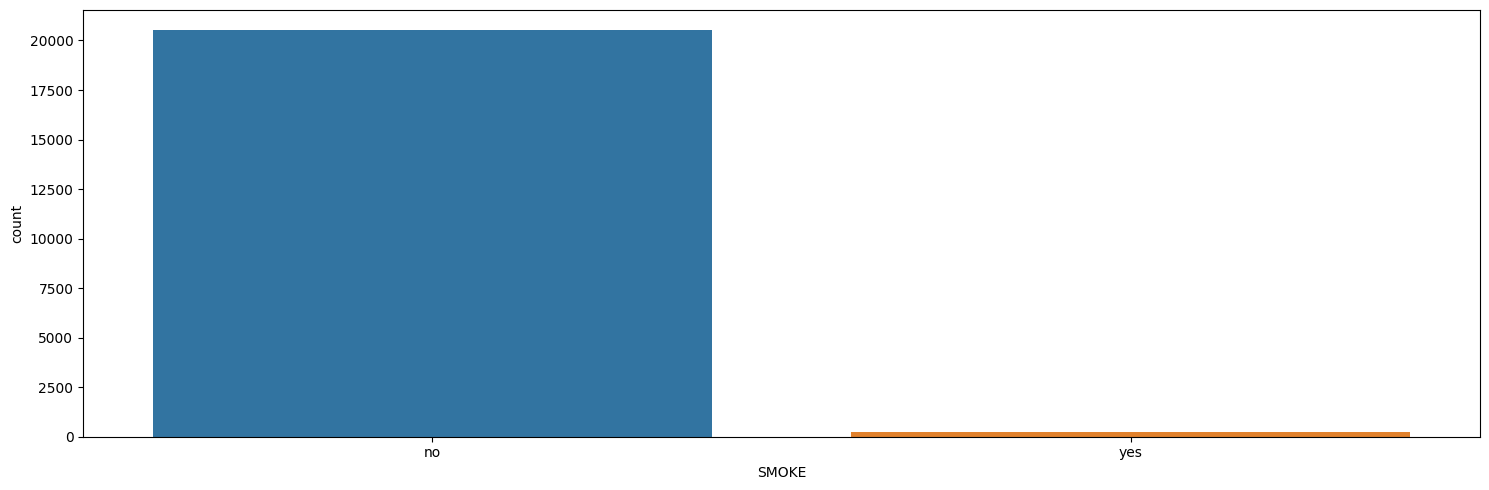

In [2071]:
count_plot(df,'SMOKE')

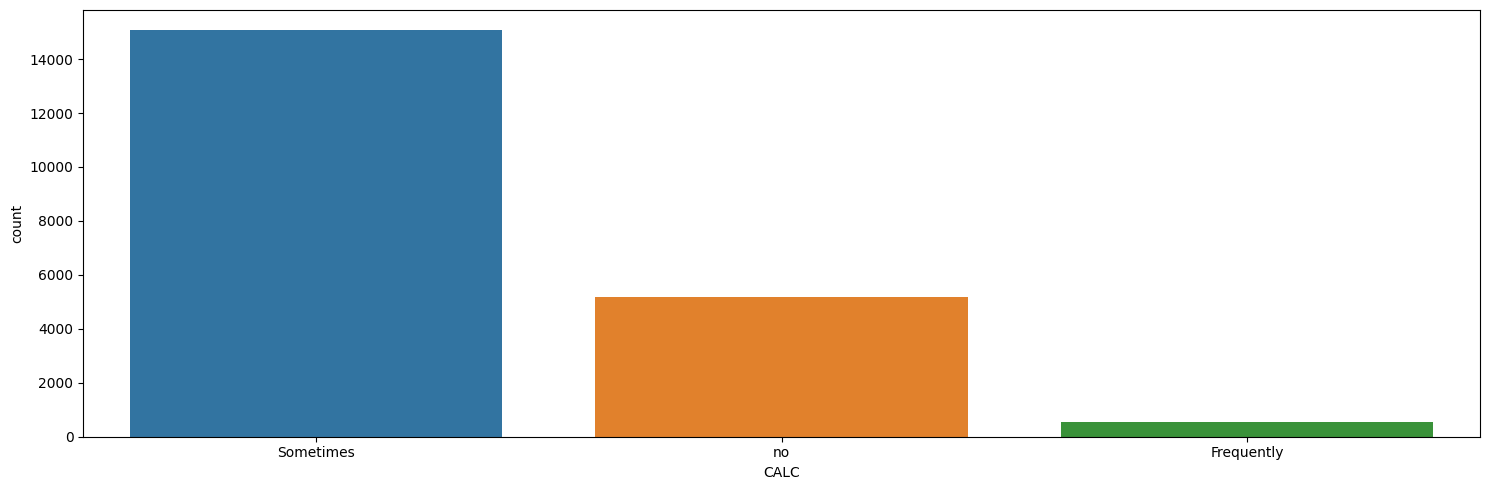

In [2072]:
count_plot(df,'CALC')

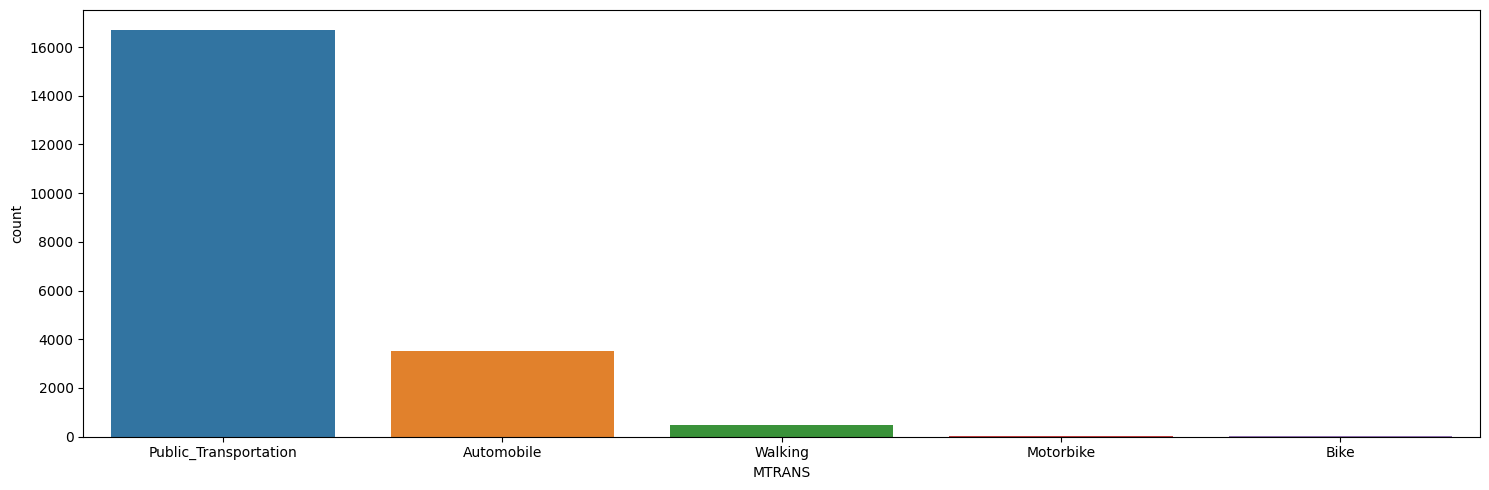

In [2073]:
count_plot(df,'MTRANS')

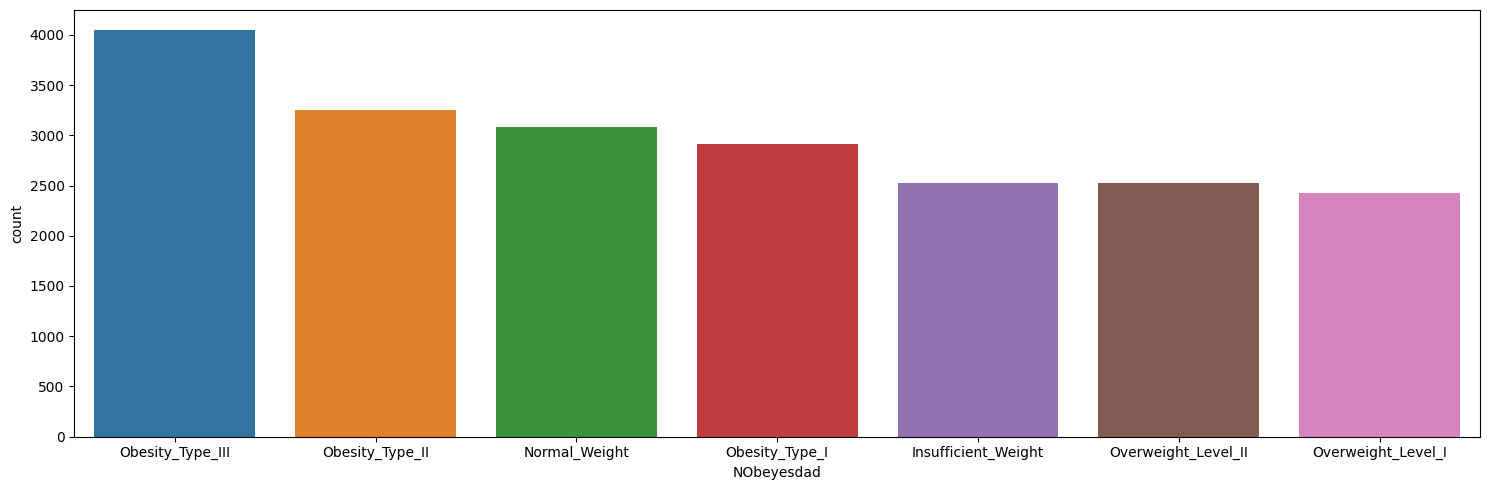

In [2074]:
count_plot(df,'NObeyesdad')

In [2075]:
#Define function to make bivariate graphs
def multiple_category_count_plot(dataframe,first_dimension,horizontal_label,second_dimension):

    plt.figure(figsize=(20,15))
    sns.barplot(x=horizontal_label,
                y=first_dimension,
                hue=second_dimension,
                data=df.groupby([first_dimension, 
                second_dimension]).size().to_frame(horizontal_label).reset_index())
    plt.title(f"{first_dimension} - {second_dimension}")
    plt.show()

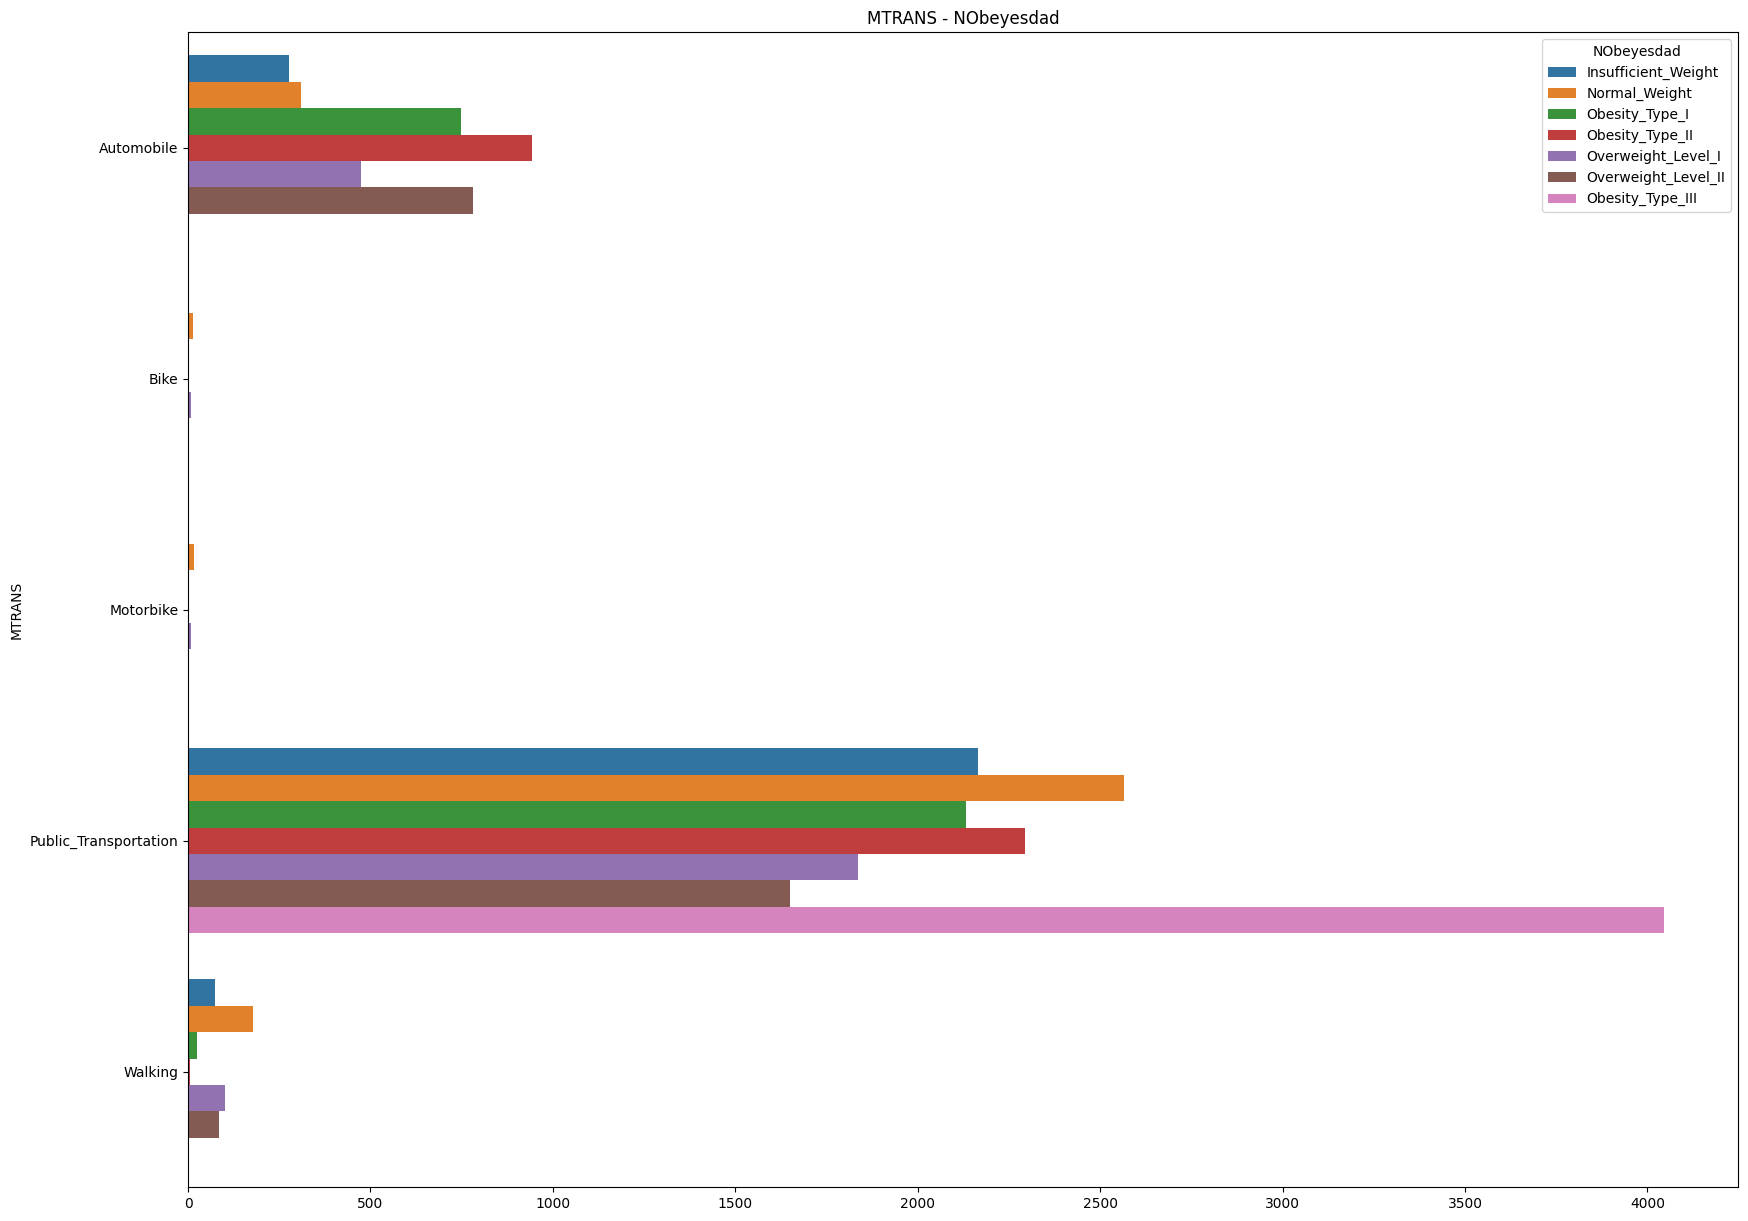

In [2076]:
#Comparing Obese with Mode of transport.
multiple_category_count_plot(df,'MTRANS',"",'NObeyesdad')

- Most of them travel in Public transportation and few of them are having presonal automobile.
- Here we can see that overweight people are traveling less in public transport but more in automobile.
- Most of overweight people can't travel from bike or else they can walk due to knee problems.
- Normal weight category peoples falls in walking category rather than any else.

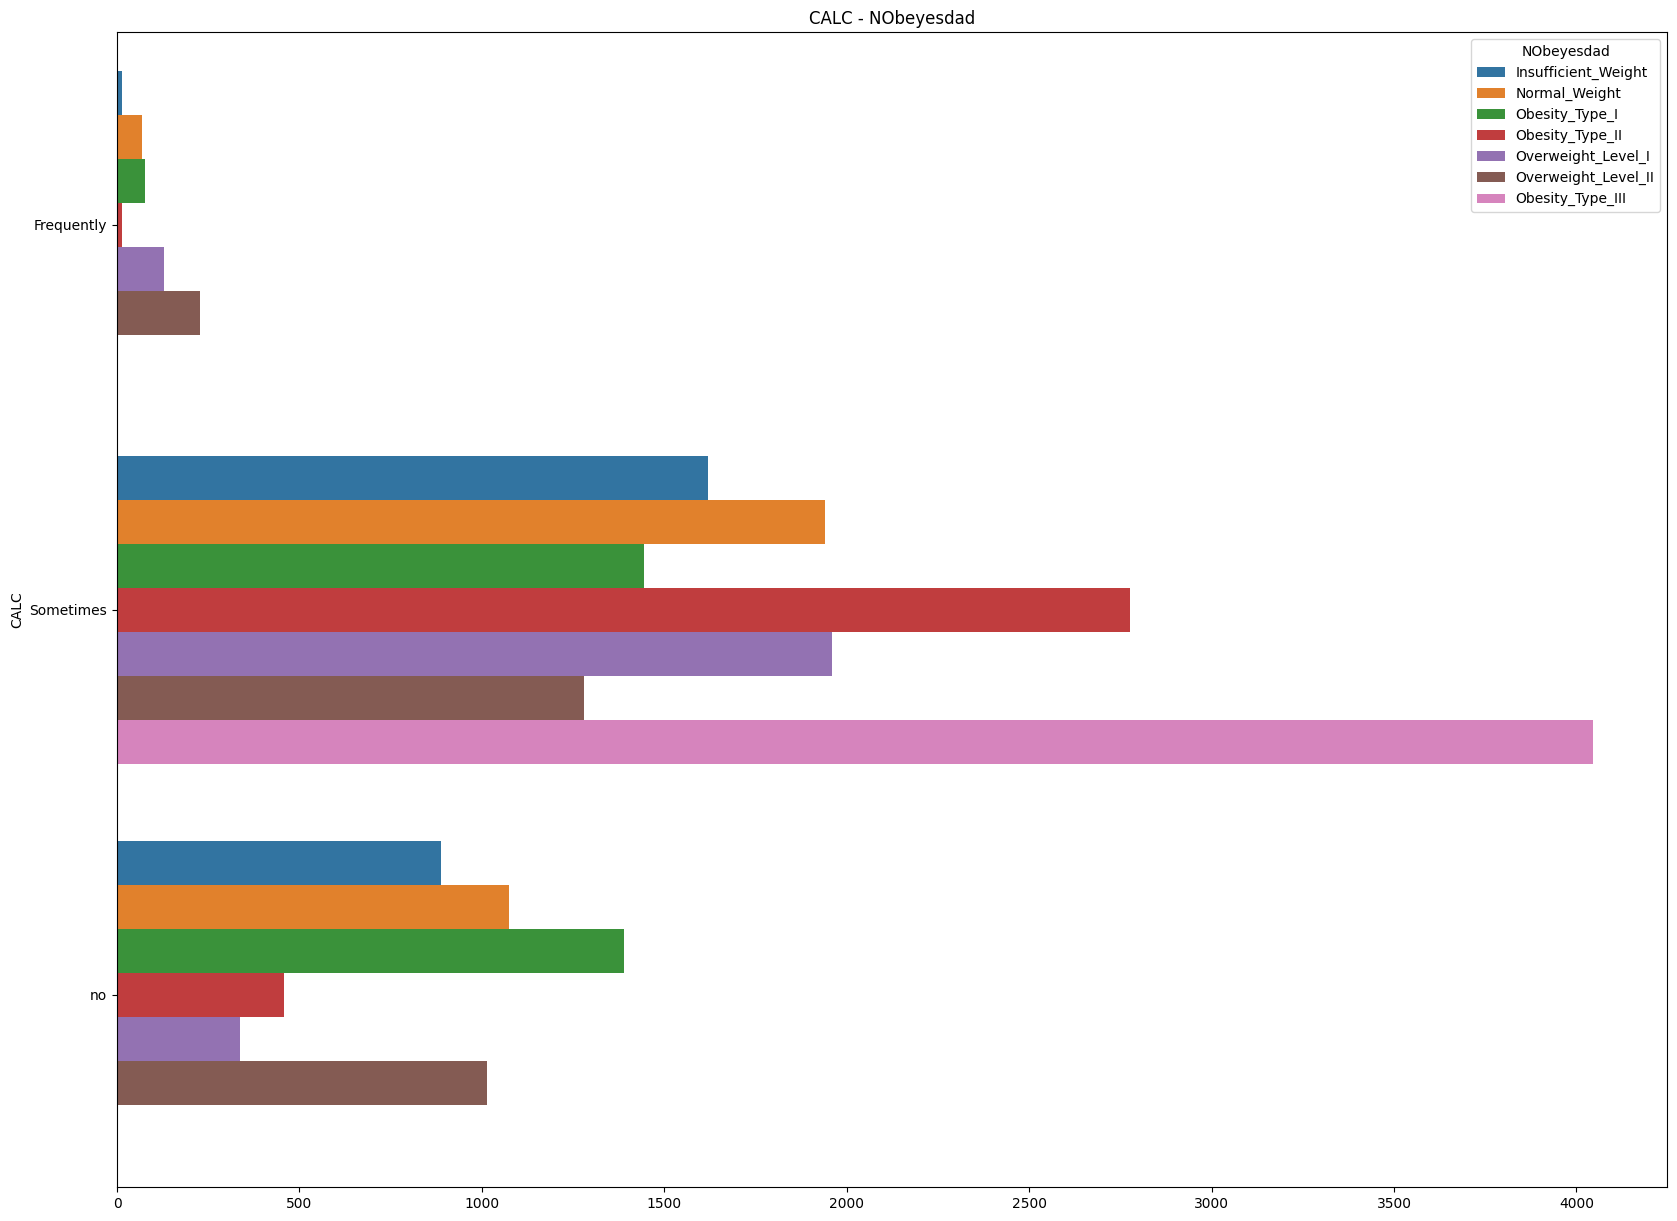

In [2077]:
#Comparing which category which consume more calories.
multiple_category_count_plot(df,'CALC',"",'NObeyesdad')

- Here we can see that *Obesity-Type-3* consume calories *sometimes* as they should not be talking calories even sometimes if they want to get fit or else want to lose weight.
- Most aware category in *NO* is *Over Weight Level 1* less amount to *Over Weight Level 1* are not consumming any calories and predicted to fall into fit category very soon.

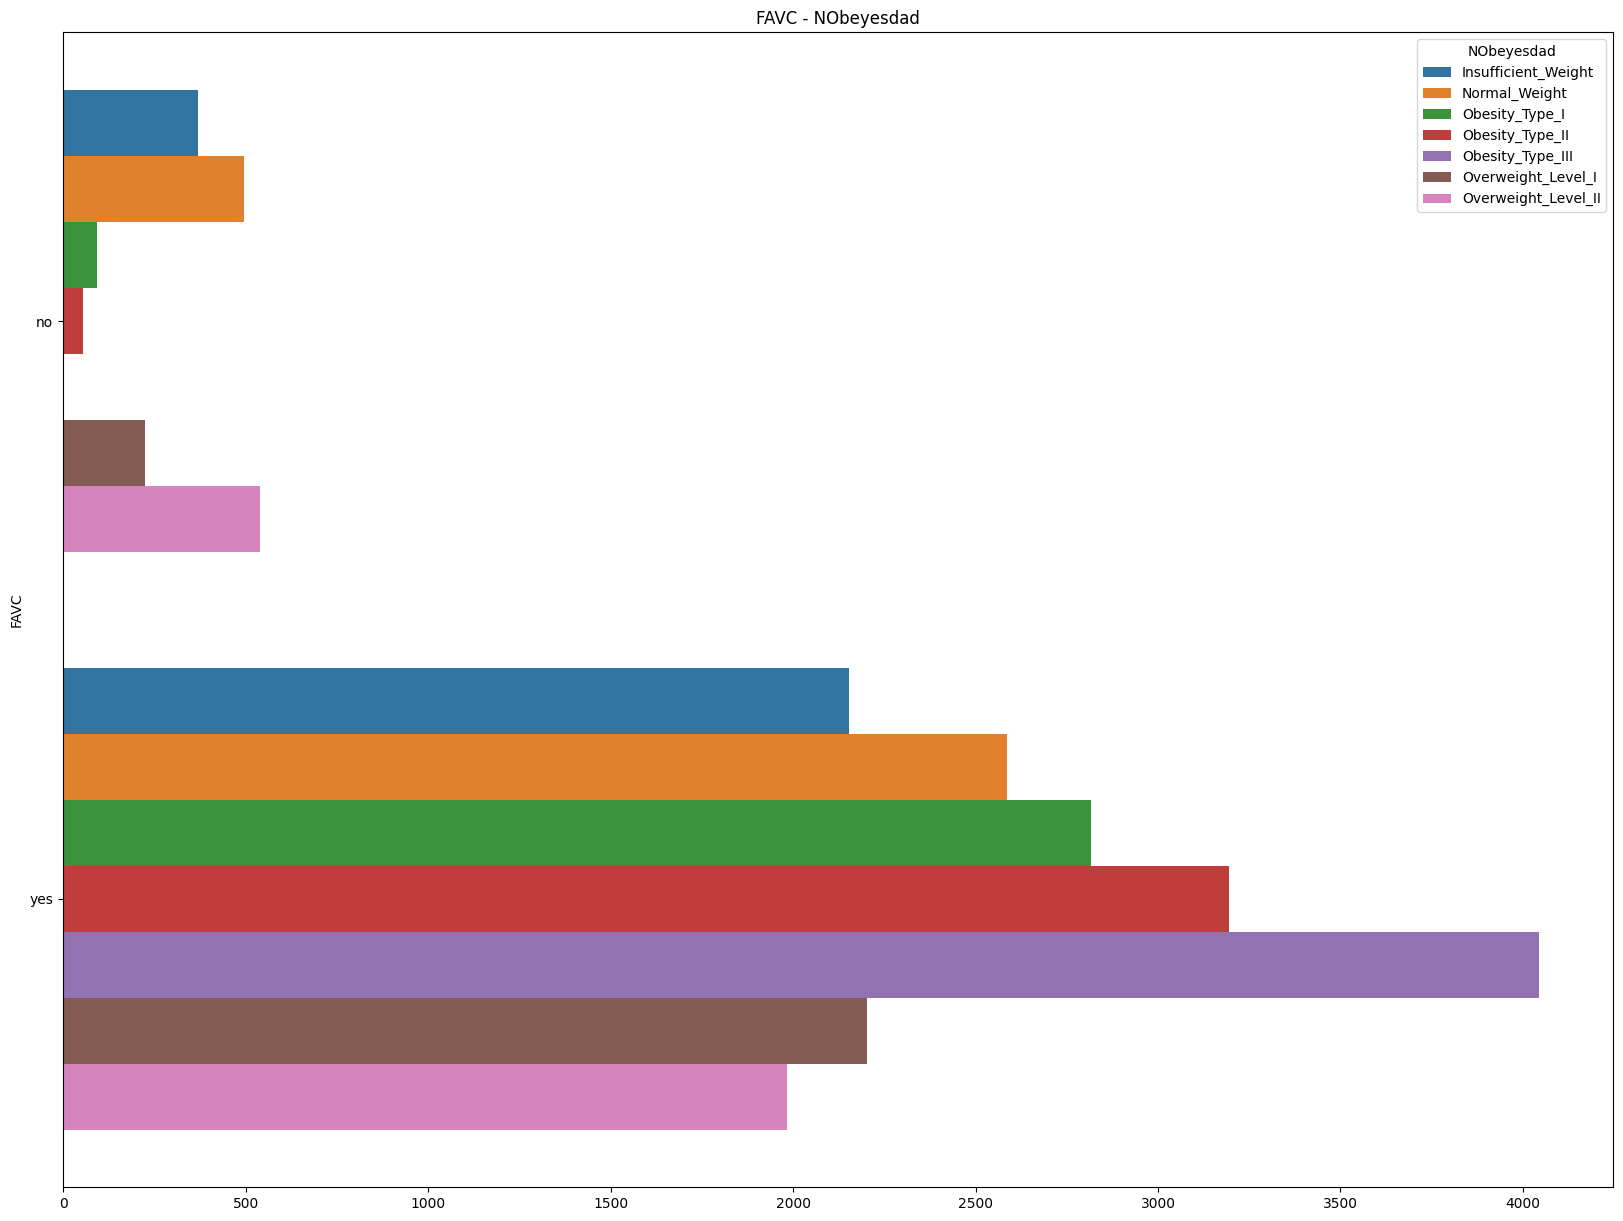

In [2078]:
multiple_category_count_plot(df,'FAVC',"",'NObeyesdad')

- Most of are having vote in *Yes* category

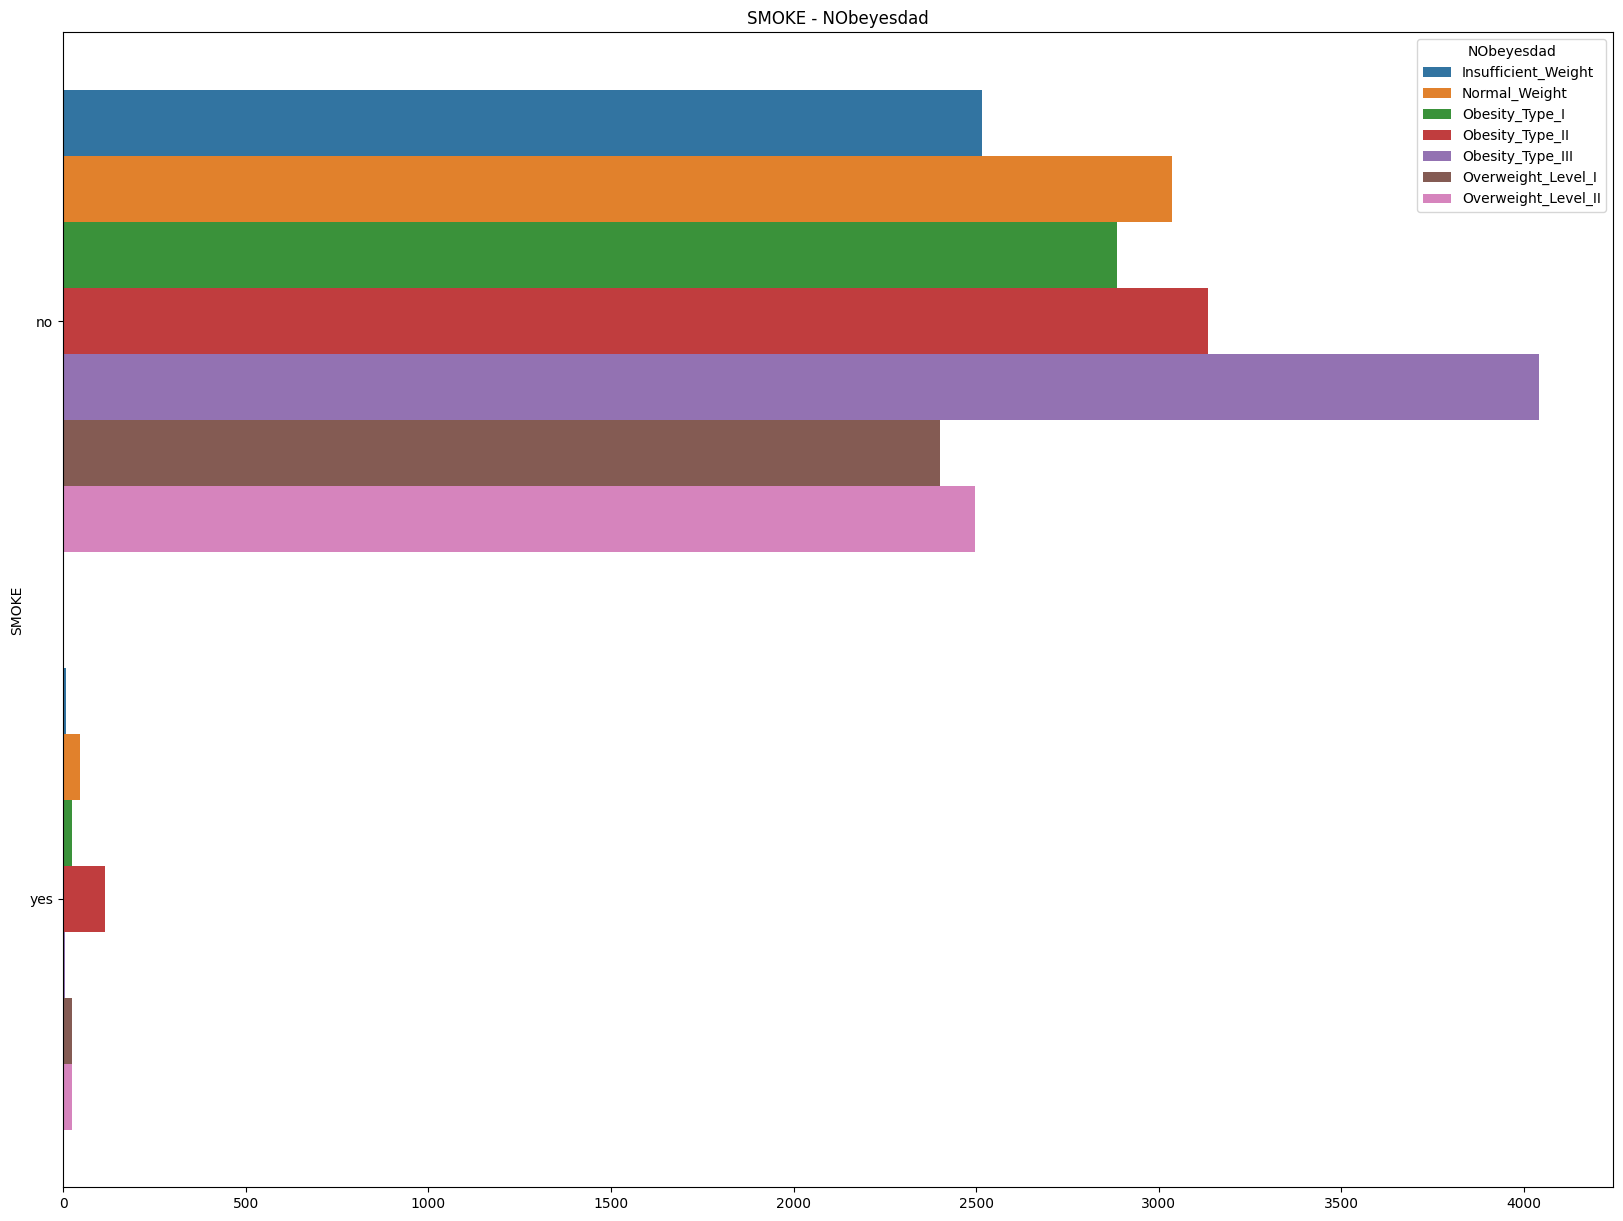

In [2079]:
multiple_category_count_plot(df,'SMOKE',"",'NObeyesdad')


- Most of them are not smoking thats good sign for improvement

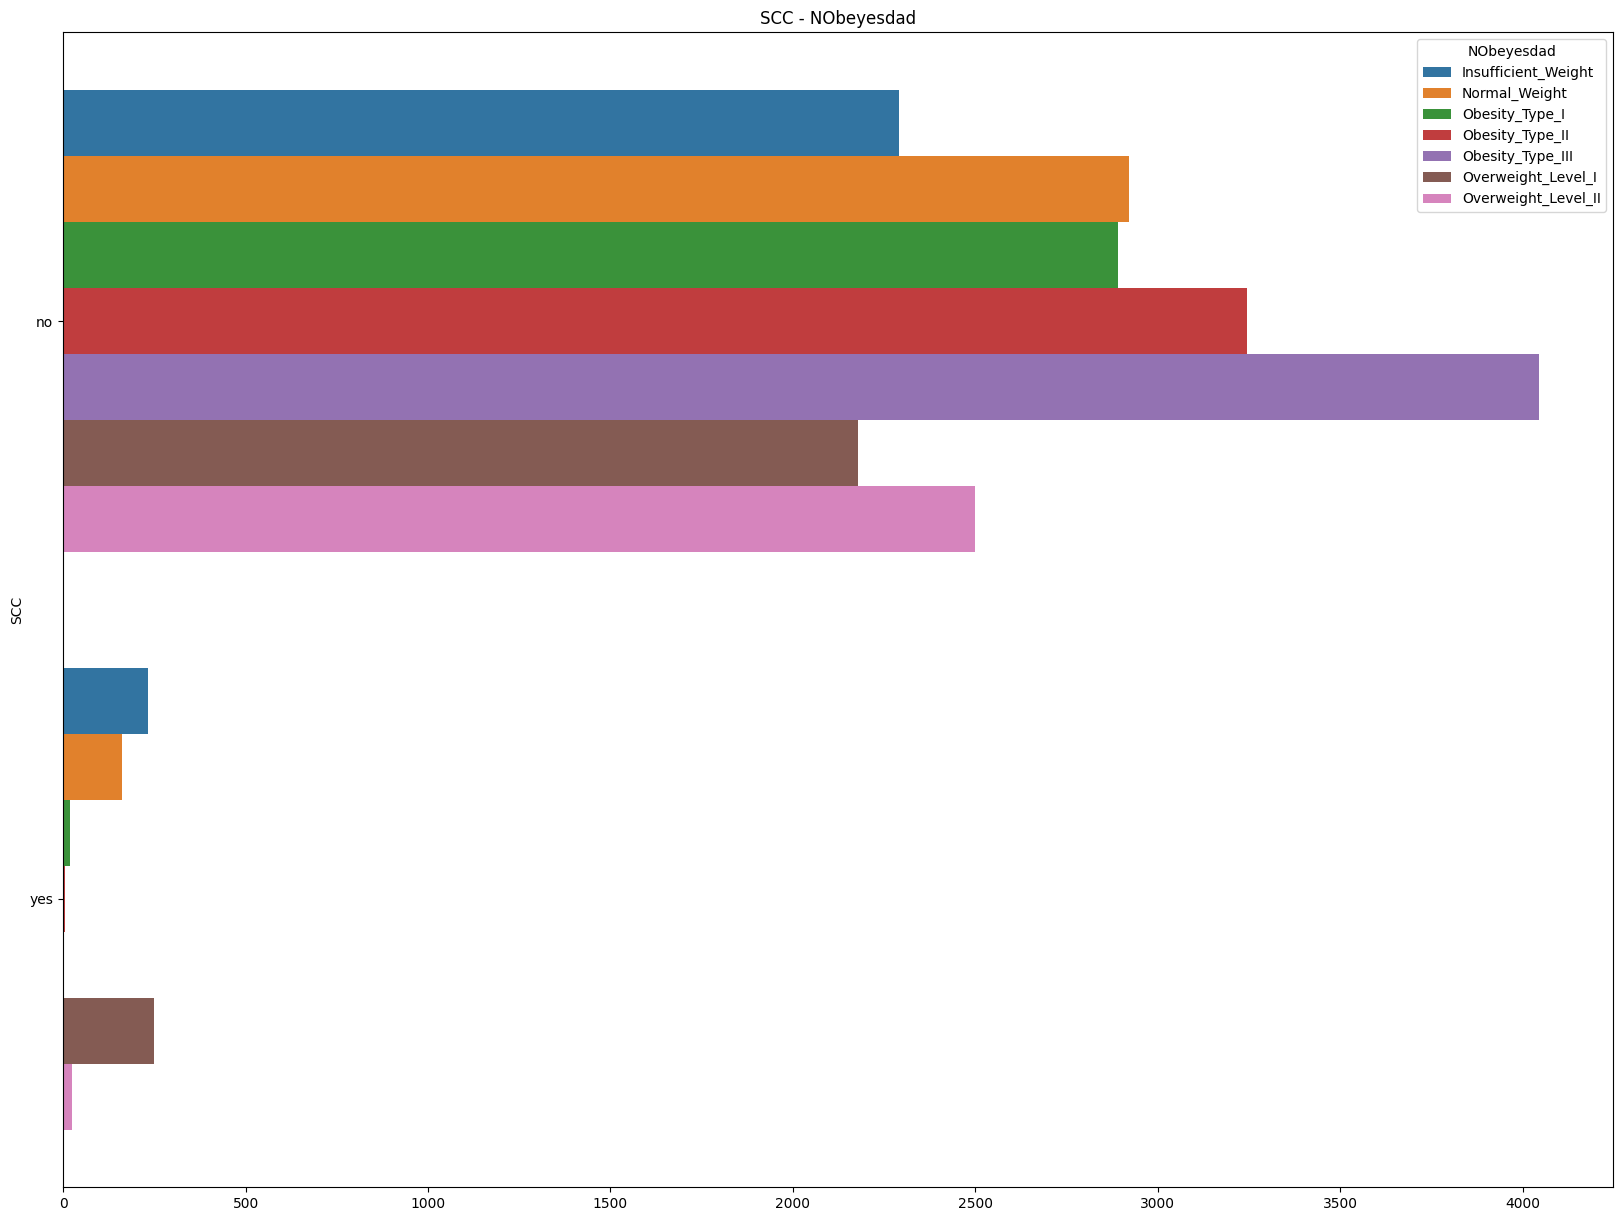

In [2080]:
multiple_category_count_plot(df,'SCC',"",'NObeyesdad')

- Here we can see that *under weight* people get *SCC* more than any other cases,.
- What stage of cancer is squamous cell?
  - The stages of squamous cell carcinoma (SCC) range from 0–4. At stage 0, there are atypical cells that are not yet cancerous, which may or may not be visible. By stage 4, the cancer may be large and will have spread to other organs. In its early stages, SCC is highly treatable

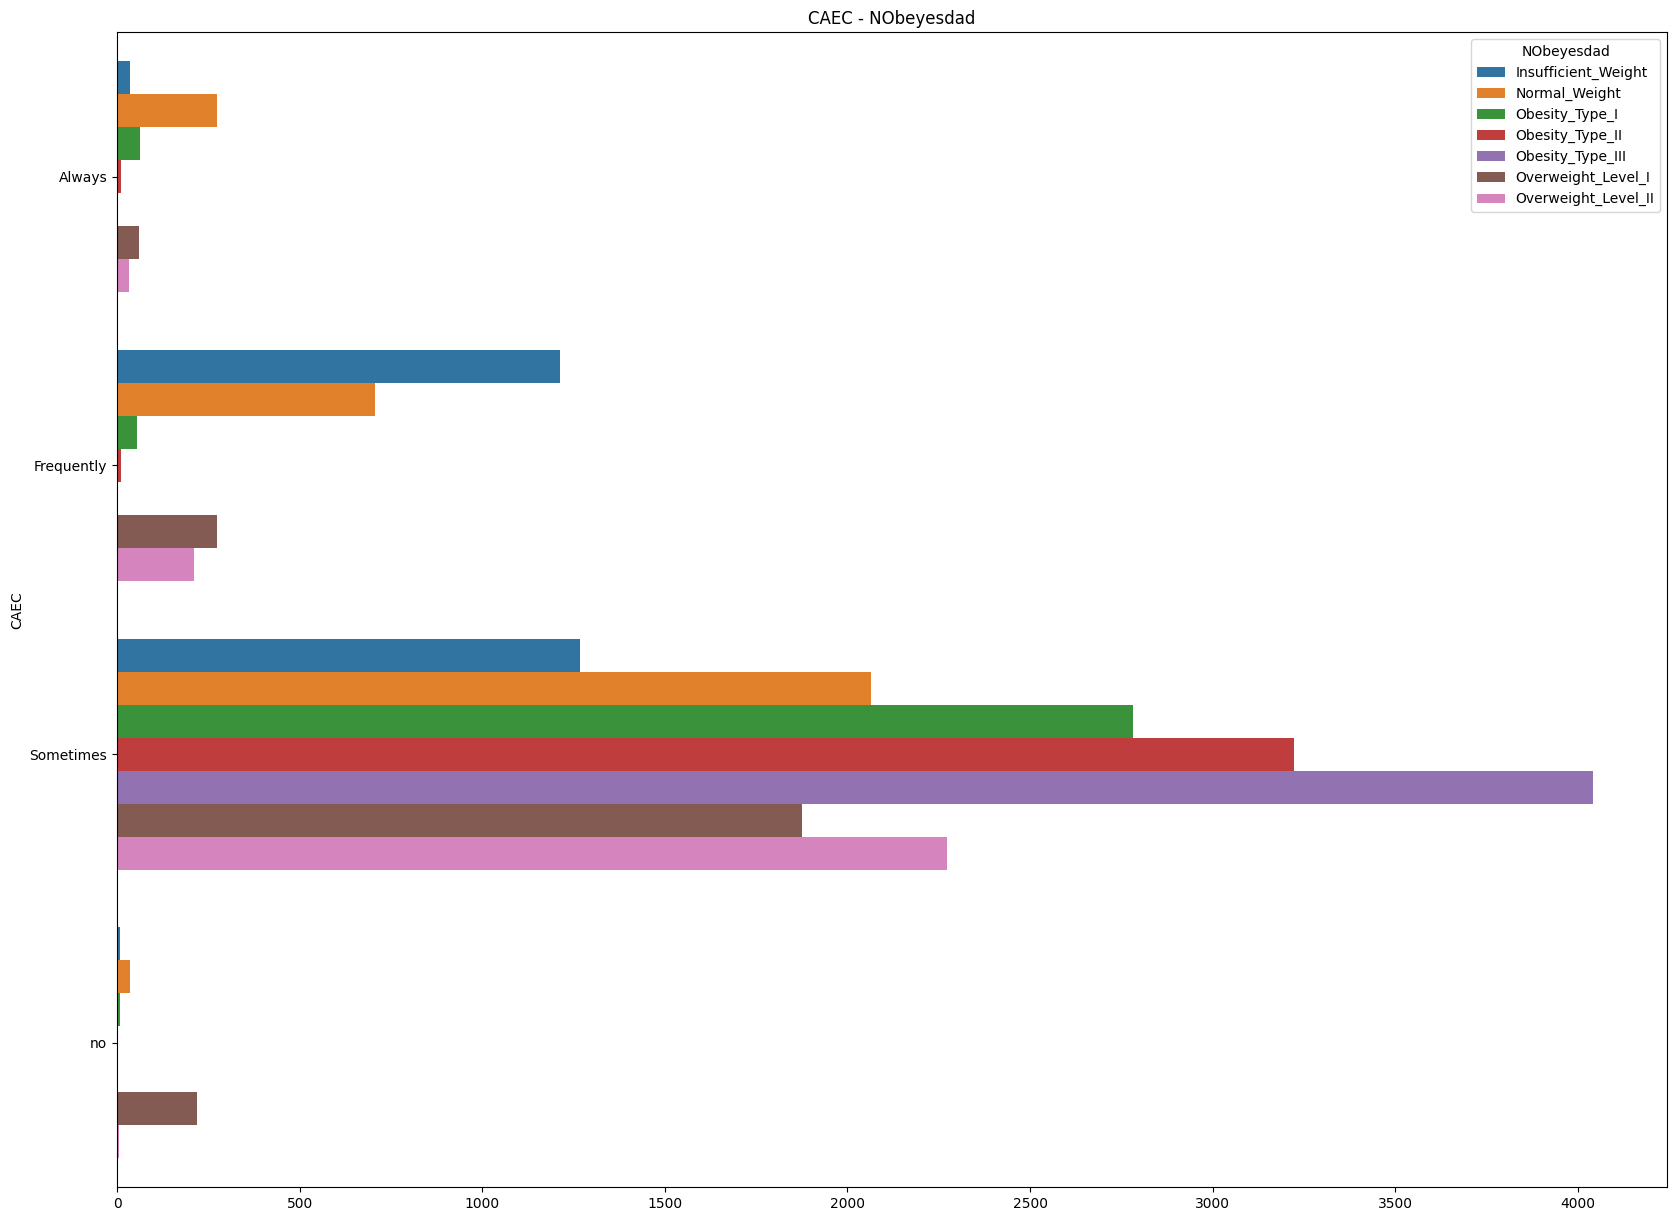

In [2081]:

multiple_category_count_plot(df,'CAEC',"",'NObeyesdad')
Image(url="types-of-arrhythmia.jpg", width=1500, height=600) 

- Here we can see *Normal Weight* people takes this *Arrhythmia* test *Always*.
- *Insuffient weights* category and *Normal Weight* category take this test frequently.
- All the categories are taking it sometimes as there room to get better in shape is long and they should keep a track of how losing weight or else gaining weight are affeting thier heart in the process, they should take this test more often.

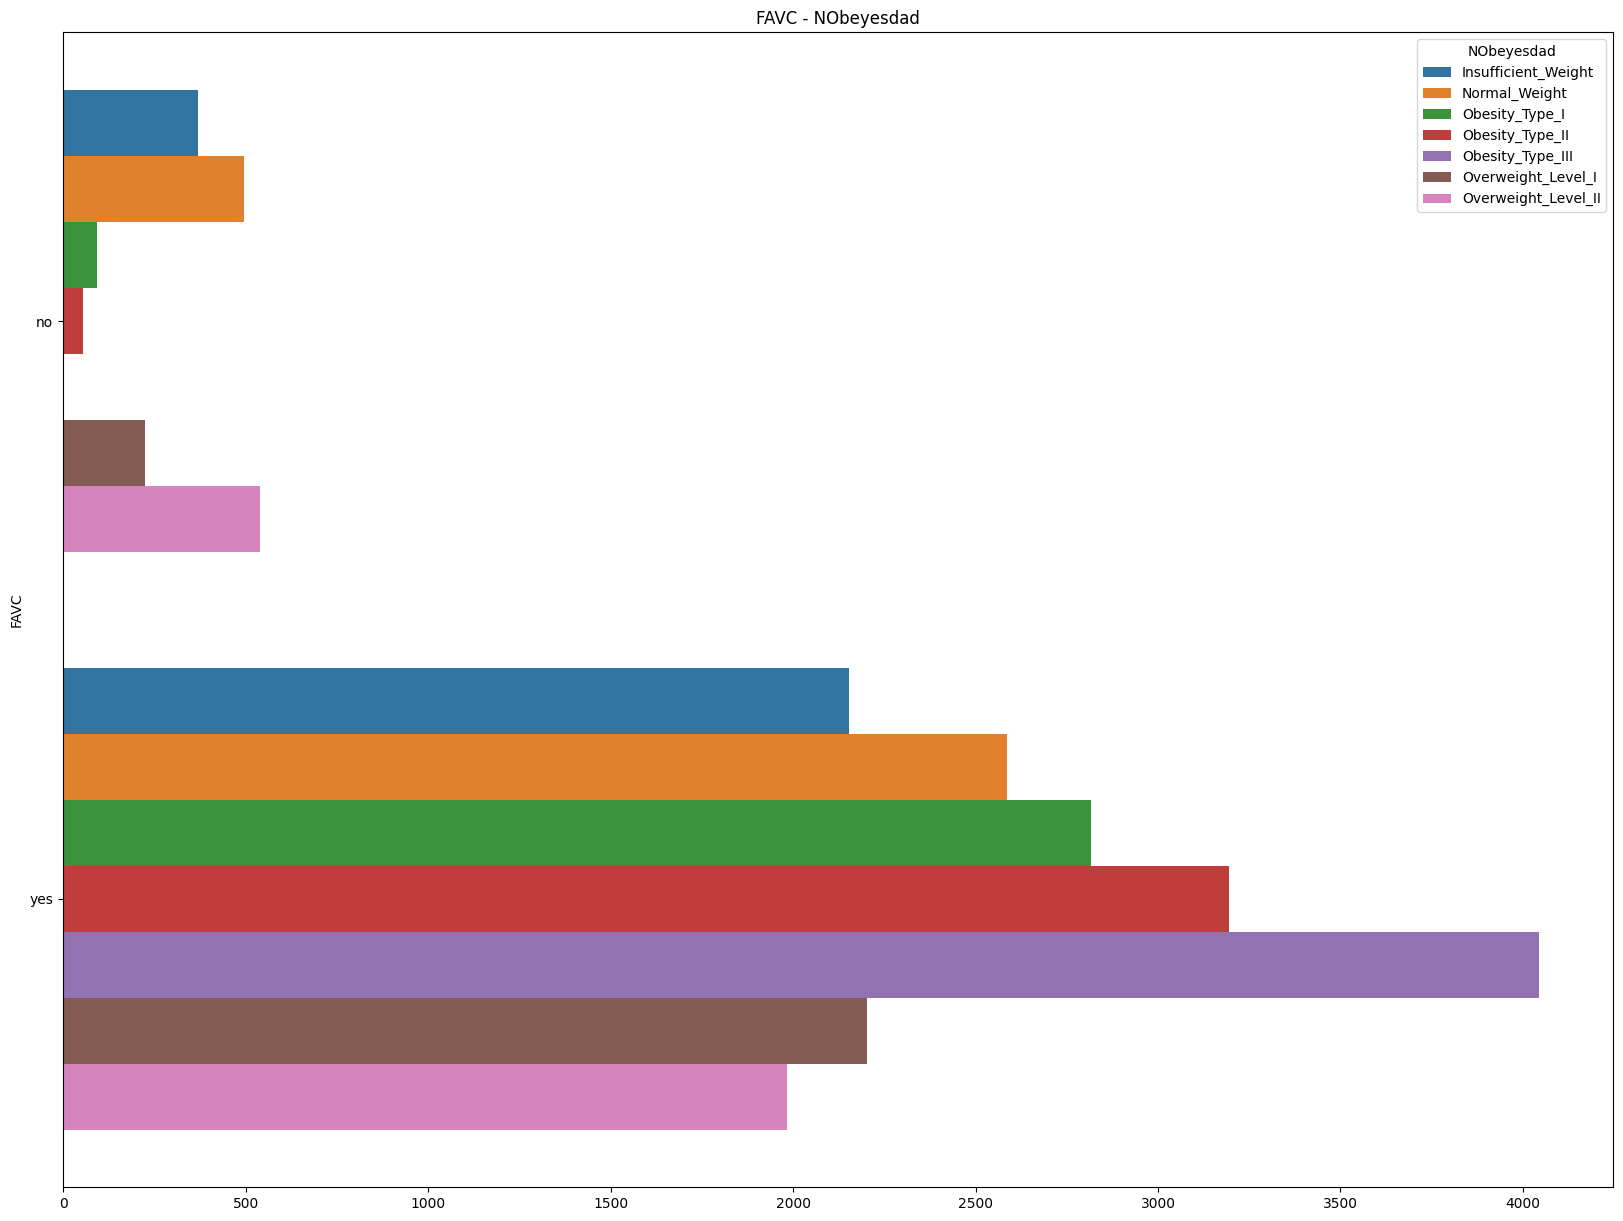

In [2082]:
multiple_category_count_plot(df,'FAVC',"",'NObeyesdad')

- What is a normal FVC?
  - Normal findings of spirometry are an FEV1/FVC ratio of greater than 0.70 and both FEV1 and FVC above 80% of the predicted value. If lung volumes are performed, TLC above 80% of the predictive value is normal. Diffusion capacity above 75% of the predicted value is also considered normal.
- What is FVC full for?
  - The FVC is the forced vital capacity. It requires that the subject make a maximal inspiration to TLC, then make a maximal forced expiratory effort, leaving only the RV. In a normal subject, the FEV1/FVC is greater than 0.8; patients with obstructive lung disease, such as asthma or COPD, show a decreased FEV1/FVC.

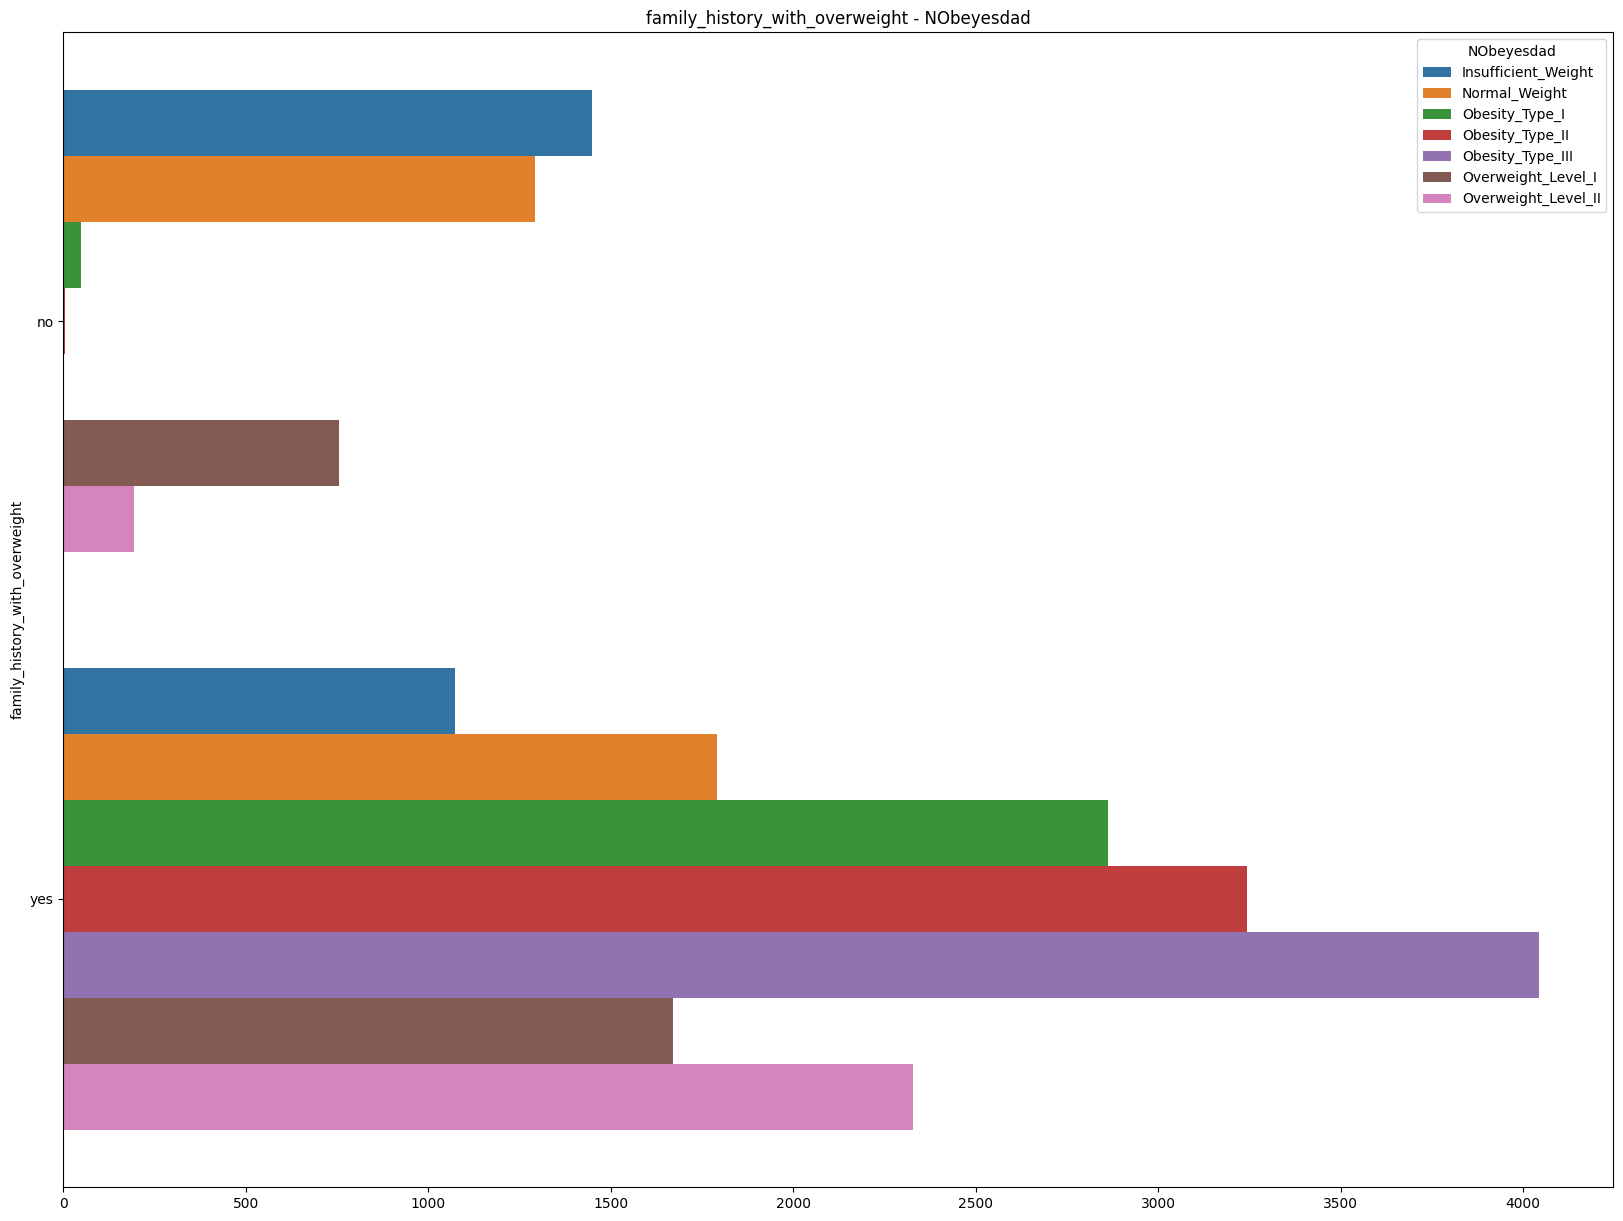

In [2083]:
multiple_category_count_plot(df,'family_history_with_overweight',"",'NObeyesdad')

- Most of them are in *yes* category 
- Does having a family history increase the chances of obesity? 
    - Those with a family history of obesity (who had higher BMI) can be at risk of developing obesity. Research suggests that about 35-40% of a child's weight predisposition is inherited from their parents
    - Research on families and obesity reveals that children of overweight parents have an 80 percent chance of also being overweight

<Axes: xlabel='NObeyesdad', ylabel='Count'>

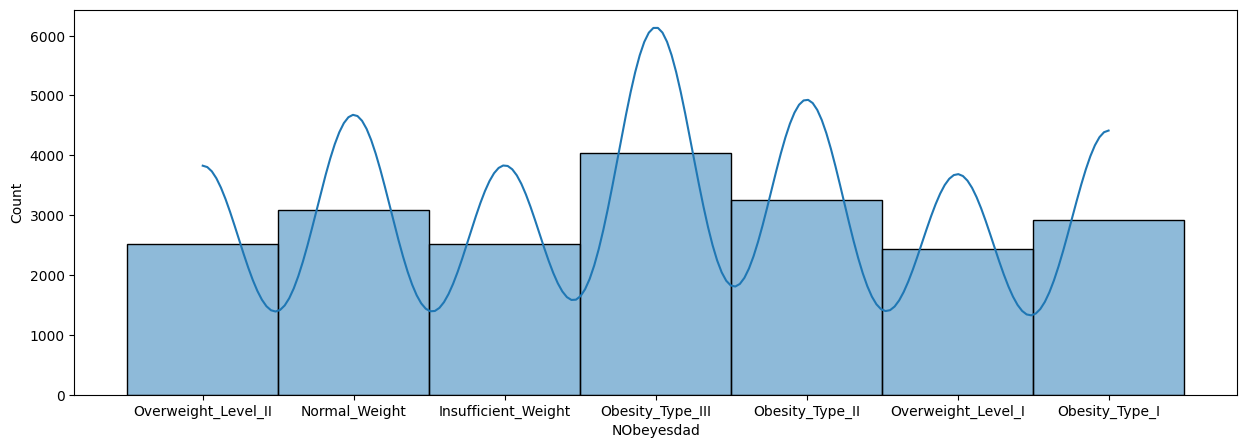

In [2084]:
plt.figure(figsize=(15,5))
sns.histplot(df['NObeyesdad'],kde=True)

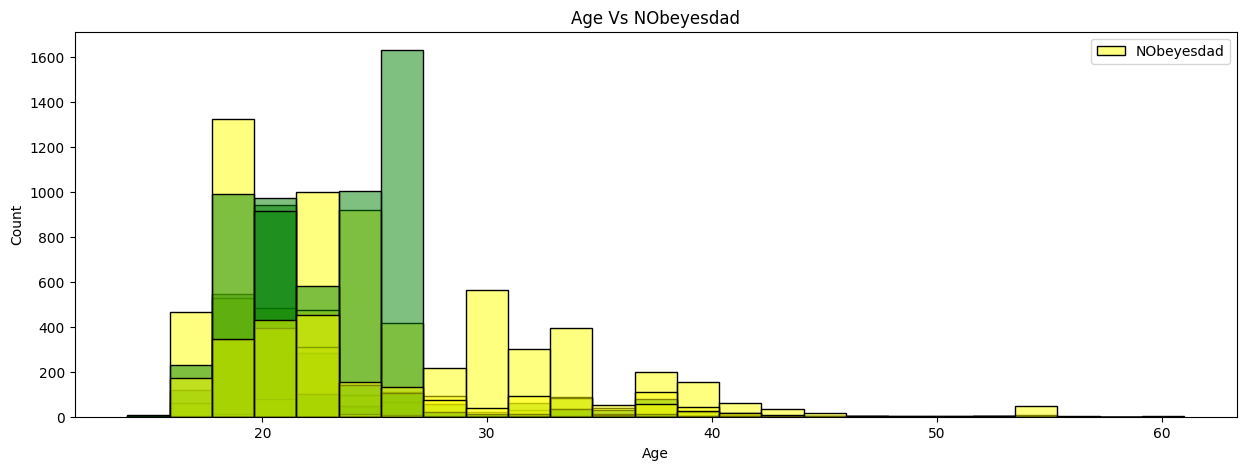

In [2085]:
#Making Function to plot numerical and categorical columns for more insights

def numrical_categorical_table(df,feature1,feature2,bins):
    plt.figure(figsize=(15,5))
    sns.histplot(data=df,bins=bins, x=feature1, hue=feature2, palette=['yellow', 'green']).set_title(f"{feature1} Vs {feature2}")
    plt.legend(labels=[feature2])
    plt.show()

#Plot Obese against Age.
numrical_categorical_table(df,'Age','NObeyesdad',25)
Image(url="Who-are-millennials-1200x729.webp", width=1200, height=500) 

- Most of the distribution is between 16 - 28 age category and here we can assume that most of young gen is doing desk job or else not participating in outdoor activities.
- Causes of obesity in children include unhealthy food choices, lack of physical activity and family eating habits. This rise in the number of overweight children is disturbing, because it causes health problems and can lead to social problems.
- Some consider millennials to be one of the heaviest generations. In the U.K., researchers found at least seven in 10 people born in the millennial generations will be overweight or obese before they reach middle age. Baby boomers only faced rates of five in 10.

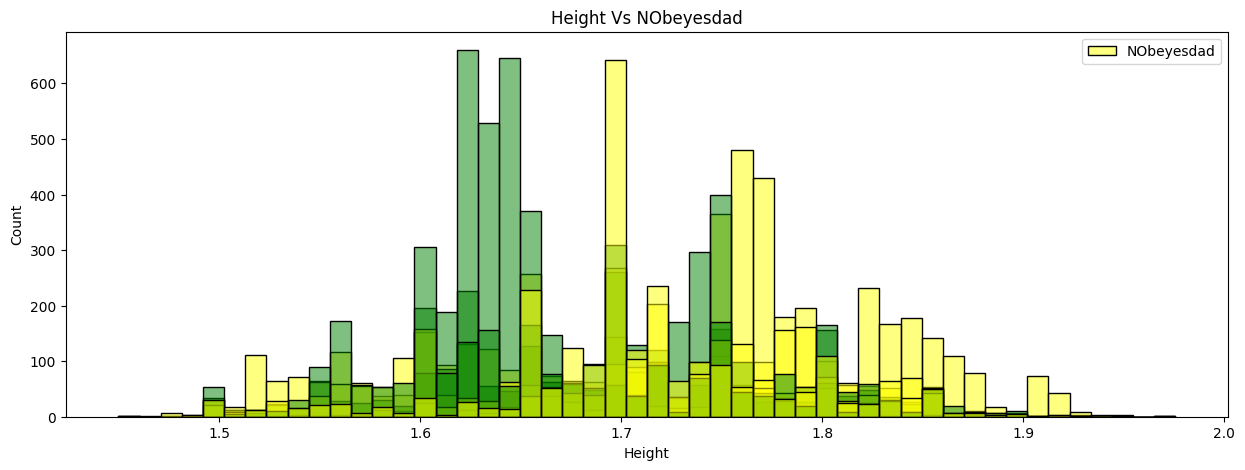

In [2086]:
numrical_categorical_table(df,'Height','NObeyesdad',50)

- We can see that most of height category falls in *1.6* - *1.67*

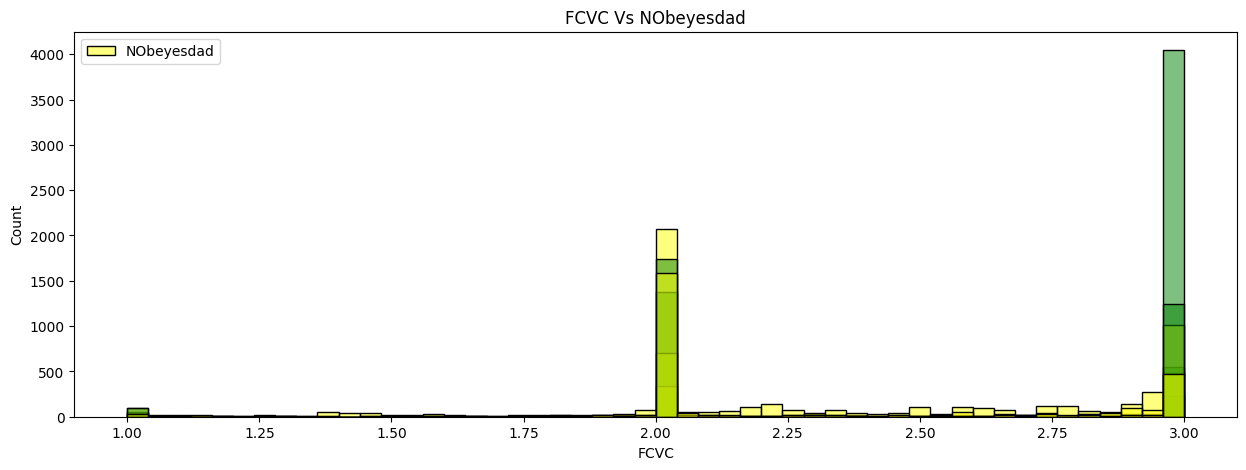

In [2087]:
numrical_categorical_table(df,'FCVC','NObeyesdad',50)

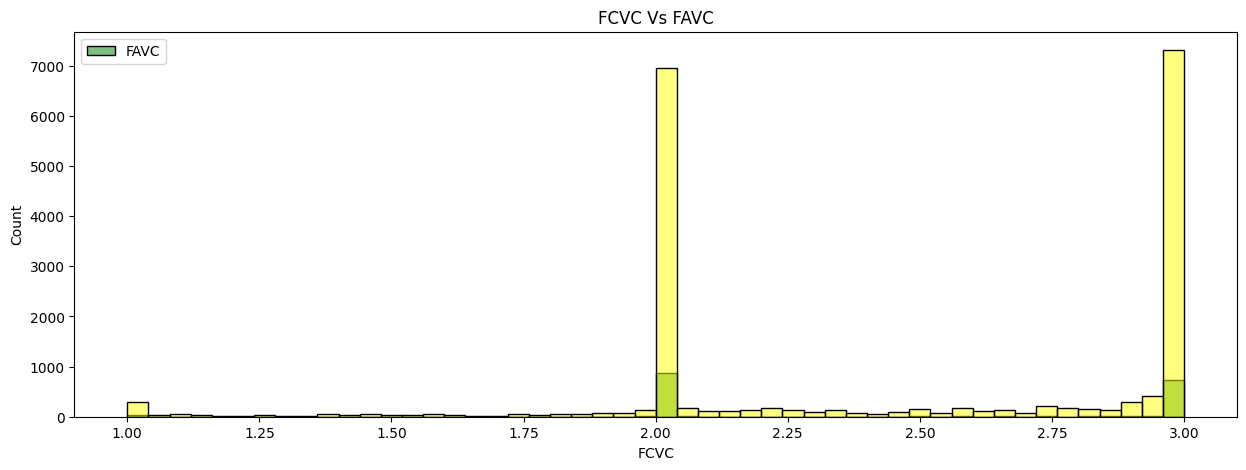

In [2088]:
numrical_categorical_table(df,'FCVC','FAVC',50)

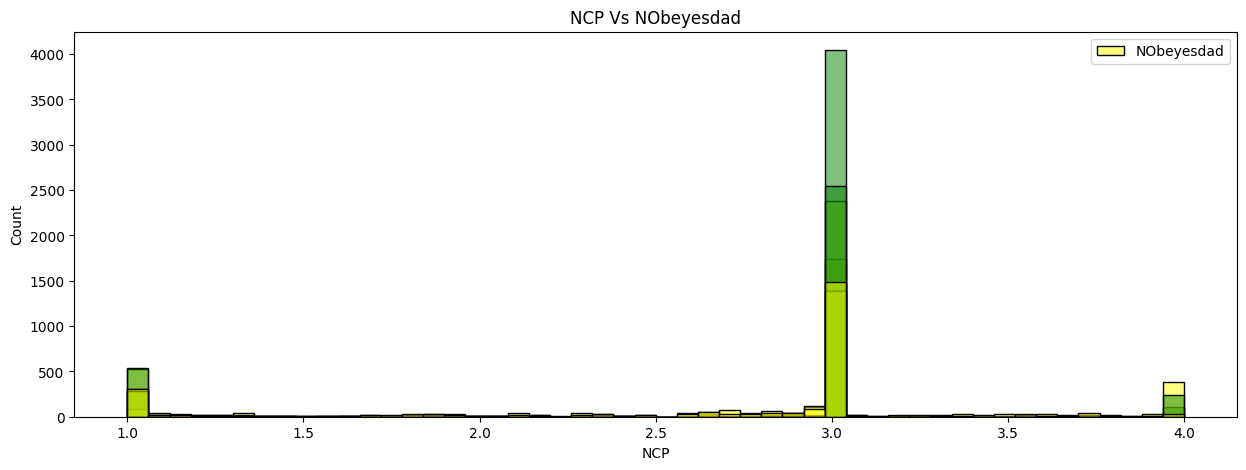

In [2089]:
numrical_categorical_table(df,'NCP','NObeyesdad',50)

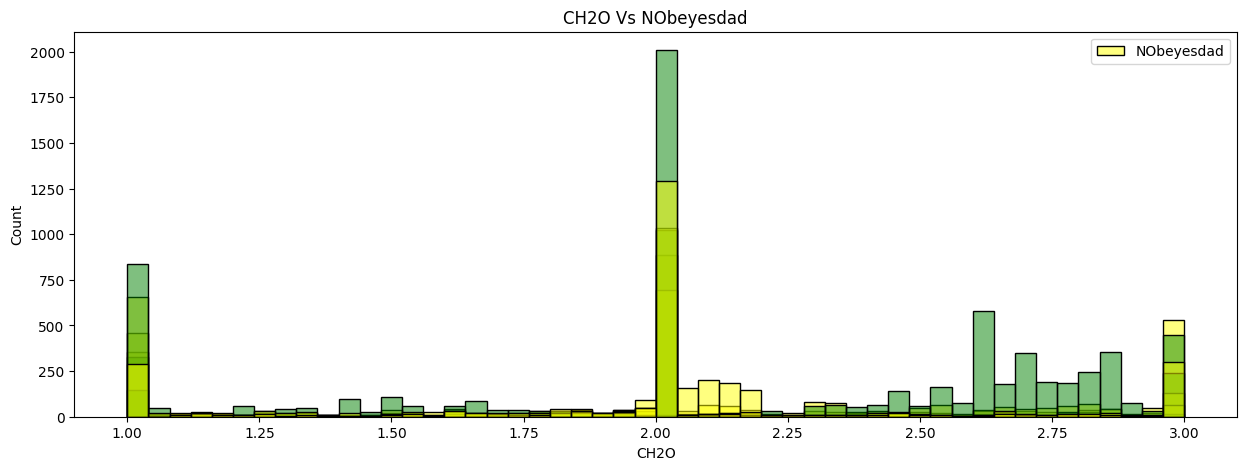

In [2090]:
numrical_categorical_table(df,'CH2O','NObeyesdad',50)

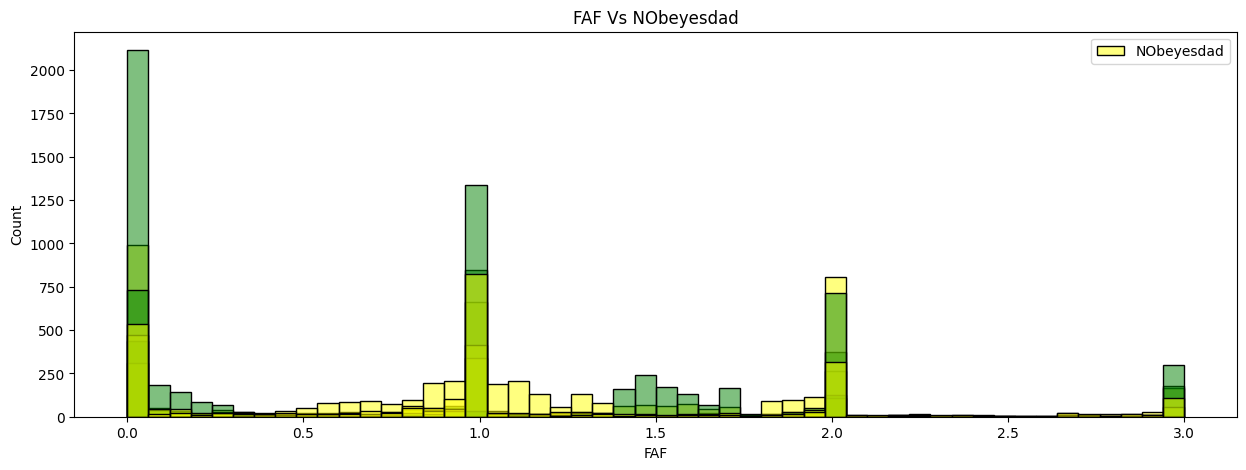

In [2091]:
numrical_categorical_table(df,'FAF','NObeyesdad',50)

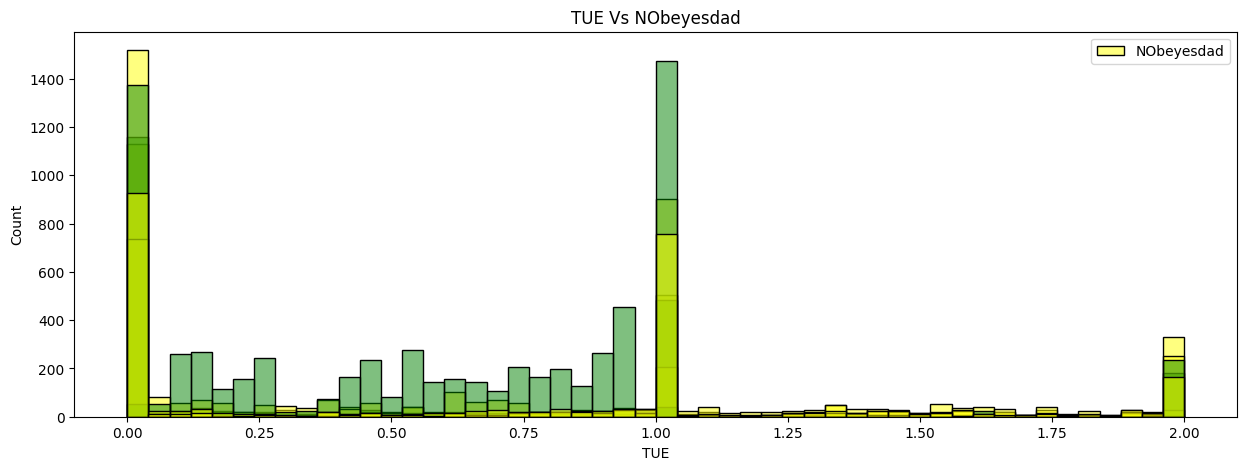

In [2092]:
numrical_categorical_table(df,'TUE','NObeyesdad',50)

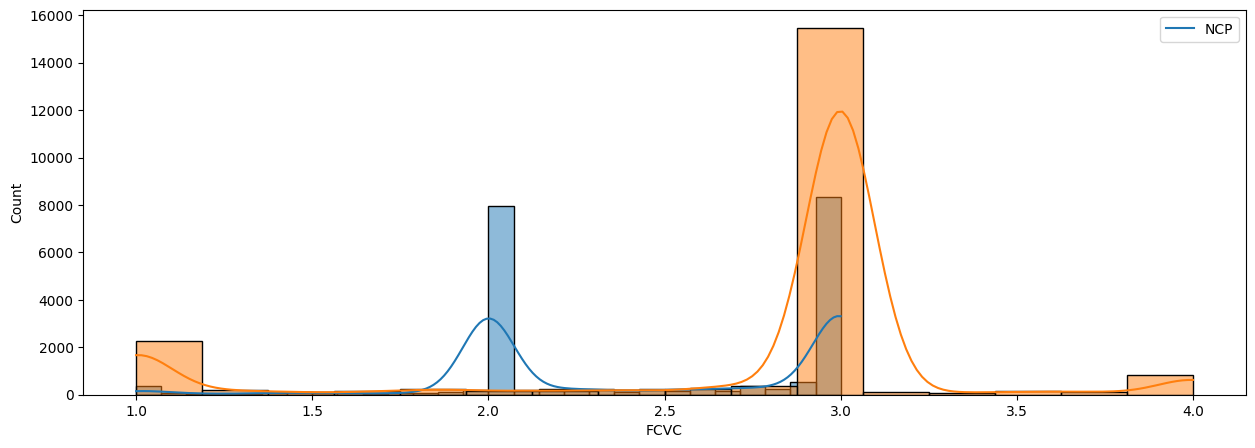

In [2093]:
def numrical_table(df,feature1,feature2):
    plt.figure(figsize=(15,5))
    sns.histplot(data=df[feature1],kde=True)
    sns.histplot(data=df[feature2],kde=True)
    plt.legend(labels=[feature2])
    plt.show()

numrical_table(df,'FCVC','NCP')

In [2094]:
class encoding:

    #init function
    def __init__(self,dataframe,dataframee,featuress,features): 

        self.dataframe = dataframe
        self.dataframee = dataframee
        self.featuress = featuress
        self.features = features




    #Make Dummies variable for categorical data
    def one_hot_endoing(dataframe,featuress):

        #one_hot object data
        one_hot_endoing_data = pd.get_dummies(dataframe[featuress],dtype='int')
        
        #drop primary columns as we are having encoded columns 
        dataframe.drop(featuress,inplace=True,axis=1)

        #concat them with main dataframe
        dataframe = pd.concat([dataframe,one_hot_endoing_data],axis='columns')

        #return
        return dataframe
        
        
        """
        
        To prevent biases from being introduced, One-Hot Encoding is preferable 
        for nominal data (where there is no inherent order among categories). Label encoding, 
        however, might be more appropriate for ordinal data (where categories naturally have an order). 
        The effect of dimensionality should also be taken into account
        

        """
    
    #Make label encoder for 
    def lable_encoder(dataframee,features):

        try:
            from sklearn.preprocessing import LabelEncoder
            Lable = LabelEncoder()
            dataframee[features] = Lable.fit_transform(features)
            return dataframee
        except:
            print("Went someting wrong")
            

#Appling one hot encoding method on categorical data.
df = encoding.one_hot_endoing(df,['Gender','family_history_with_overweight','FAVC','CAEC','CALC','SMOKE','SCC'])

#Appling label encoder for odinal data(which has some meaning withing values)
df = encoding.lable_encoder(df,['MTRANS','NObeyesdad'])

In [2095]:
def select_x_y(df,column):

    X = df.drop(columns=['NObeyesdad'])
    y = df['NObeyesdad']
    return X,y

X,y = select_x_y(df,'NObeyesdad')

In [2096]:
def training_split(X,y):    
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    print(X_train.shape)
    print(y_train.shape)
    y_train.values.reshape(-1,1)
    return X_train,X_test,y_train,y_test

X_train,X_test,y_train,y_test = training_split(X,y)

(16606, 26)
(16606,)


In [2097]:
class standard:
        
    def fit_transformm(X_train,X_test,y_train):
        std = StandardScaler()
        X_train = std.fit_transform(X_train)
        X_test = std.transform(X_test)
        y_train = std.fit_transform(pd.DataFrame(y_train))
        #y_test = std.transform(pd.DataFrame(y_test))
        return X_train,X_test,y_train

X_train,X_test,y_train  = standard.fit_transformm(X_train,X_test,y_train)


In [2098]:
X_train.shape

(16606, 26)

In [2099]:
#going with functional API
model = keras.Sequential()


# Input layer
model.add(keras.layers.Input(shape=(X_train.shape[1],)))

#Add Dense Layer
model.add(Dense(26,activation='relu'))
model.add(Dense(52,activation='relu'))
model.add(Dense(1,activation='softmax'))

#compile Model
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

#fir model
history = model.fit(X_train, y_train,batch_size=64,epochs=50, verbose=2,validation_split=0.2)

#model summary
model.summary()

Epoch 1/50
208/208 - 1s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 1s/epoch - 5ms/step
Epoch 2/50
208/208 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 392ms/epoch - 2ms/step
Epoch 3/50
208/208 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 351ms/epoch - 2ms/step
Epoch 4/50
208/208 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 350ms/epoch - 2ms/step
Epoch 5/50
208/208 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 358ms/epoch - 2ms/step
Epoch 6/50
208/208 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 363ms/epoch - 2ms/step
Epoch 7/50
208/208 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - 356ms/epoch - 2ms/step
Epoch 8/50
208/2

In [2100]:
score ,acc = model.evaluate(X_test,y_test,batch_size=64,verbose=2)

print( "Test accuracy", acc)

65/65 - 0s - loss: 0.0000e+00 - accuracy: 1.0000 - 201ms/epoch - 3ms/step
Test accuracy 1.0
